In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style and context
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

In [46]:
# def read_files(freq_band):
#     scpc = "_scpc_channel_data"
#     mcc = "_mcc_packet_lost"
#     sat = "_sat_packet_lost"

#     data = pd.read_csv(freq_band + scpc + '.txt', sep=",", header=0)
#     real = data.head()

#     f = open(freq_band + mcc + '.txt', "r")
#     print(f.read()) 
#     f.close()

#     f = open(freq_band + sat + '.txt', "r")
#     print(f.read()) 
#     f.close()

#     # Calculate power_dBm stats for every 5 lines (uplink/downlink pairs)
#     atmosl_uplink = []
#     atmosl_downlink = []

#     for i in range(len(data)):
#         if str(data.iloc[i,0])[-2] == '.':
#             atmosl_uplink.append(data.iloc[i,1])
#         else:
#             atmosl_downlink.append(data.iloc[i,1])

#     print(f"Average uplink Atmospheric loss (dB): {np.average(atmosl_uplink):.3f}")
#     print(f"Stddev uplink Atmospheric loss (dB): {np.std(atmosl_uplink):.3f}")

#     print(f"Average downlink Atmospheric loss (dB): {np.average(atmosl_downlink):.3f}")
#     print(f"Stddev downlink Atmospheric loss (dB): {np.std(atmosl_downlink):.3f}")
#     print()

#     # Calculate power_dBm stats for every 5 lines (uplink/downlink pairs)
#     fspl_uplink = []
#     fspl_downlink = []
    
#     for i in range(len(data)):
#         if str(data.iloc[i,0])[-2] == '.':
#             fspl_uplink.append(data.iloc[i,2])
#         else:
#             fspl_downlink.append(data.iloc[i,2])

#     print(f"Average uplink FSPL (dB): {np.average(fspl_uplink):.3f}")
#     print(f"Stddev uplink FSPL (dB): {np.std(fspl_uplink):.3f}")

#     print(f"Average downlink FSPL (dB): {np.average(fspl_downlink):.3f}")
#     print(f"Stddev downlink FSPL (dB): {np.std(fspl_downlink):.3f}")
#     print()

#     # Calculate power_dBm stats for every 5 lines (uplink/downlink pairs)
#     power_dBm_uplink = []
#     power_dBm_downlink = []
    
#     for i in range(len(data)):
#         if str(data.iloc[i,0])[-2] == '.':
#             power_dBm_uplink.append(data.iloc[i,3])
#         else:
#             power_dBm_downlink.append(data.iloc[i,3])

#     print(f"Average uplink power (dBm): {np.average(power_dBm_uplink):.3f}")
#     print(f"Stddev uplink power (dBm): {np.std(power_dBm_uplink):.3f}")

#     print(f"Average downlink power (dBm): {np.average(power_dBm_downlink):.3f}")
#     print(f"Stddev downlink power (dBm): {np.std(power_dBm_downlink):.3f}")


def read_and_plot_files(freq_band):
    scpc_file = freq_band + "_scpc_channel_data.txt"
    raw_scpc_data = pd.read_csv(scpc_file, sep=",", header=0)
    ul_scpc_data = raw_scpc_data[~raw_scpc_data['simTime'].astype(str).str.contains("000")]

    weather_file = freq_band + "_mcc_weather_data.txt"
    raw_weather_data = pd.read_csv(weather_file, sep=",", header=0)
    ul_weather_data = raw_weather_data[~raw_weather_data['simTime'].astype(str).str.contains("0001")]

    dl_scpc_data = raw_scpc_data[raw_scpc_data['simTime'].astype(str).str.contains("000")]

    uplink_packet_loss_file = freq_band + "_sat_packet_loss_details.txt"
    upl_data = pd.read_csv(uplink_packet_loss_file, sep=",", header=0)

    downlink_packet_loss_file = freq_band + "_mcc_packet_loss_details.txt"
    downl_data = pd.read_csv(downlink_packet_loss_file, sep=",", header=0)

    num_mccs = ul_weather_data['MCCIndex'].max() + 1

    # Custom color palette
    colors = sns.color_palette("husl", 4)

    for mcc_index in range(num_mccs):
        try:
            # Generic sim_time for all
            sim_time = ul_weather_data.loc[ul_weather_data['MCCIndex'] == mcc_index, 'simTime']

            # Packet loss time series
            packet_loss_downl_sim_time = downl_data.loc[downl_data['MCC_idx'] == mcc_index, 'simTime']
            dl_sim_time = dl_scpc_data.loc[dl_scpc_data['MCC_idx'] == mcc_index, 'simTime']

            # Get data to plot per MCC
            weather_data_to_plot = ul_weather_data.loc[ul_weather_data['MCCIndex'] == mcc_index, 'specWeatherModel']
            weather_loss = ul_scpc_data.loc[ul_scpc_data['MCC_idx'] == mcc_index, 'rainLoss_dB'].values + \
                          ul_scpc_data.loc[ul_scpc_data['MCC_idx'] == mcc_index, 'cloudLoss_dB'].values
            rain_loss = ul_scpc_data.loc[ul_scpc_data['MCC_idx'] == mcc_index, 'rainLoss_dB'].values
            cloud_loss = ul_scpc_data.loc[ul_scpc_data['MCC_idx'] == mcc_index, 'cloudLoss_dB'].values
            upl = upl_data.loc[upl_data['MCC_idx'] == mcc_index, 'packet_is_loss']
            downl = downl_data.loc[downl_data['MCC_idx'] == mcc_index, 'packet_is_loss']

            dl_loss_data = dl_scpc_data.loc[dl_scpc_data['MCC_idx'] == mcc_index]

            # Create figure with seaborn style
            fig1, axes1 = plt.subplots(5, 1, figsize=(20, 10))
            fig1.suptitle(f'Uplink Analysis for MCC {mcc_index} - {freq_band}', fontsize=14, y=1.02)

            # Plot 1: Rainfall (mm of rain)
            sns.lineplot(x=sim_time, y=weather_data_to_plot, ax=axes1[0], label='Rainfall (mm of rain)', color=colors[0])
            axes1[0].set_title('Rainfall during Uplink')
            axes1[0].set_xlabel('')

            # Plot 2: Rain Loss
            sns.lineplot(x=sim_time, y=rain_loss, ax=axes1[1], label='Rain Loss (dB)', color=colors[2])
            axes1[1].set_xlabel('')
            axes1[1].set_ylabel('Rain Loss (dB)')

            # Plot 3: Cloud Loss
            sns.lineplot(x=sim_time, y=cloud_loss, ax=axes1[2], label='Cloud Loss (dB)', color=colors[3])
            axes1[2].set_xlabel('')
            axes1[2].set_ylabel('Cloud Loss (dB)')

            # Plot 4: Weather Loss (Rain + Cloud Loss)
            sns.lineplot(x=sim_time, y=weather_loss, ax=axes1[3], label='Weather Loss (dB)', color=colors[1])
            axes1[3].set_title('Weather Loss during Uplink')
            axes1[3].set_ylabel('Weather Loss (dB)')

            # Plot 5: Uplink Packet Loss
            sns.lineplot(x=sim_time, y=upl, ax=axes1[4], label='Uplink Packet Loss', color=colors[0], drawstyle="steps-post")
            axes1[4].set_ylabel('Packet Loss (0/1)')
            axes1[4].set_title('Uplink Packet Loss')

            plt.tight_layout()
            plt.show()

            # Create second figure
            fig2, axes2 = plt.subplots(5, 1, figsize=(20, 10))
            fig2.suptitle(f'Downlink Analysis for MCC {mcc_index} - {freq_band}', fontsize=14, y=1.02)

            # Plot 1: Rainfall (mm of rain) for Downlink
            sns.lineplot(x=dl_sim_time, y=dl_loss_data['rain_mm_AtMCC'], ax=axes2[0], label='Rainfall (mm of rain)', color=colors[0])
            axes2[0].set_title('Rainfall during Downlink')
            axes2[0].set_xlabel('')

            # Plot 2: Rain Loss
            sns.lineplot(x=dl_sim_time, y=dl_loss_data['rainLoss_dB'], ax=axes2[1], label='Rain Loss (dB)', color=colors[2])
            axes2[1].set_xlabel('')
            axes2[1].set_ylabel('Rain Loss (dB)')

            # Plot 3: Cloud Loss
            sns.lineplot(x=dl_sim_time, y=dl_loss_data['cloudLoss_dB'], ax=axes2[2], label='Cloud Loss (dB)', color=colors[3])
            axes2[2].set_xlabel('')
            axes2[2].set_ylabel('Cloud Loss (dB)')

            # Plot 4: Weather Loss (Rain + Cloud Loss)
            weather_dl_loss = dl_loss_data['rainLoss_dB'] + dl_loss_data['cloudLoss_dB']
            sns.lineplot(x=dl_sim_time, y=weather_dl_loss, ax=axes2[3], label='Weather Loss (dB)', color=colors[1])
            axes2[3].set_title('Weather Loss during Downlink')
            axes2[3].set_ylabel('Weather Loss (dB)')

            # Plot 5: Downlink Packet Loss
            sns.lineplot(x=packet_loss_downl_sim_time, y=downl, ax=axes2[4], label='Downlink Packet Loss',
                         color=colors[2], drawstyle="steps-post")
            axes2[4].set_title('Downlink Packet Loss')
            axes2[4].set_ylabel('Packet Loss (0/1)')

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f'Error for MCC {mcc_index}: {str(e)}')

# Dynamic Weather Data

## C-Band

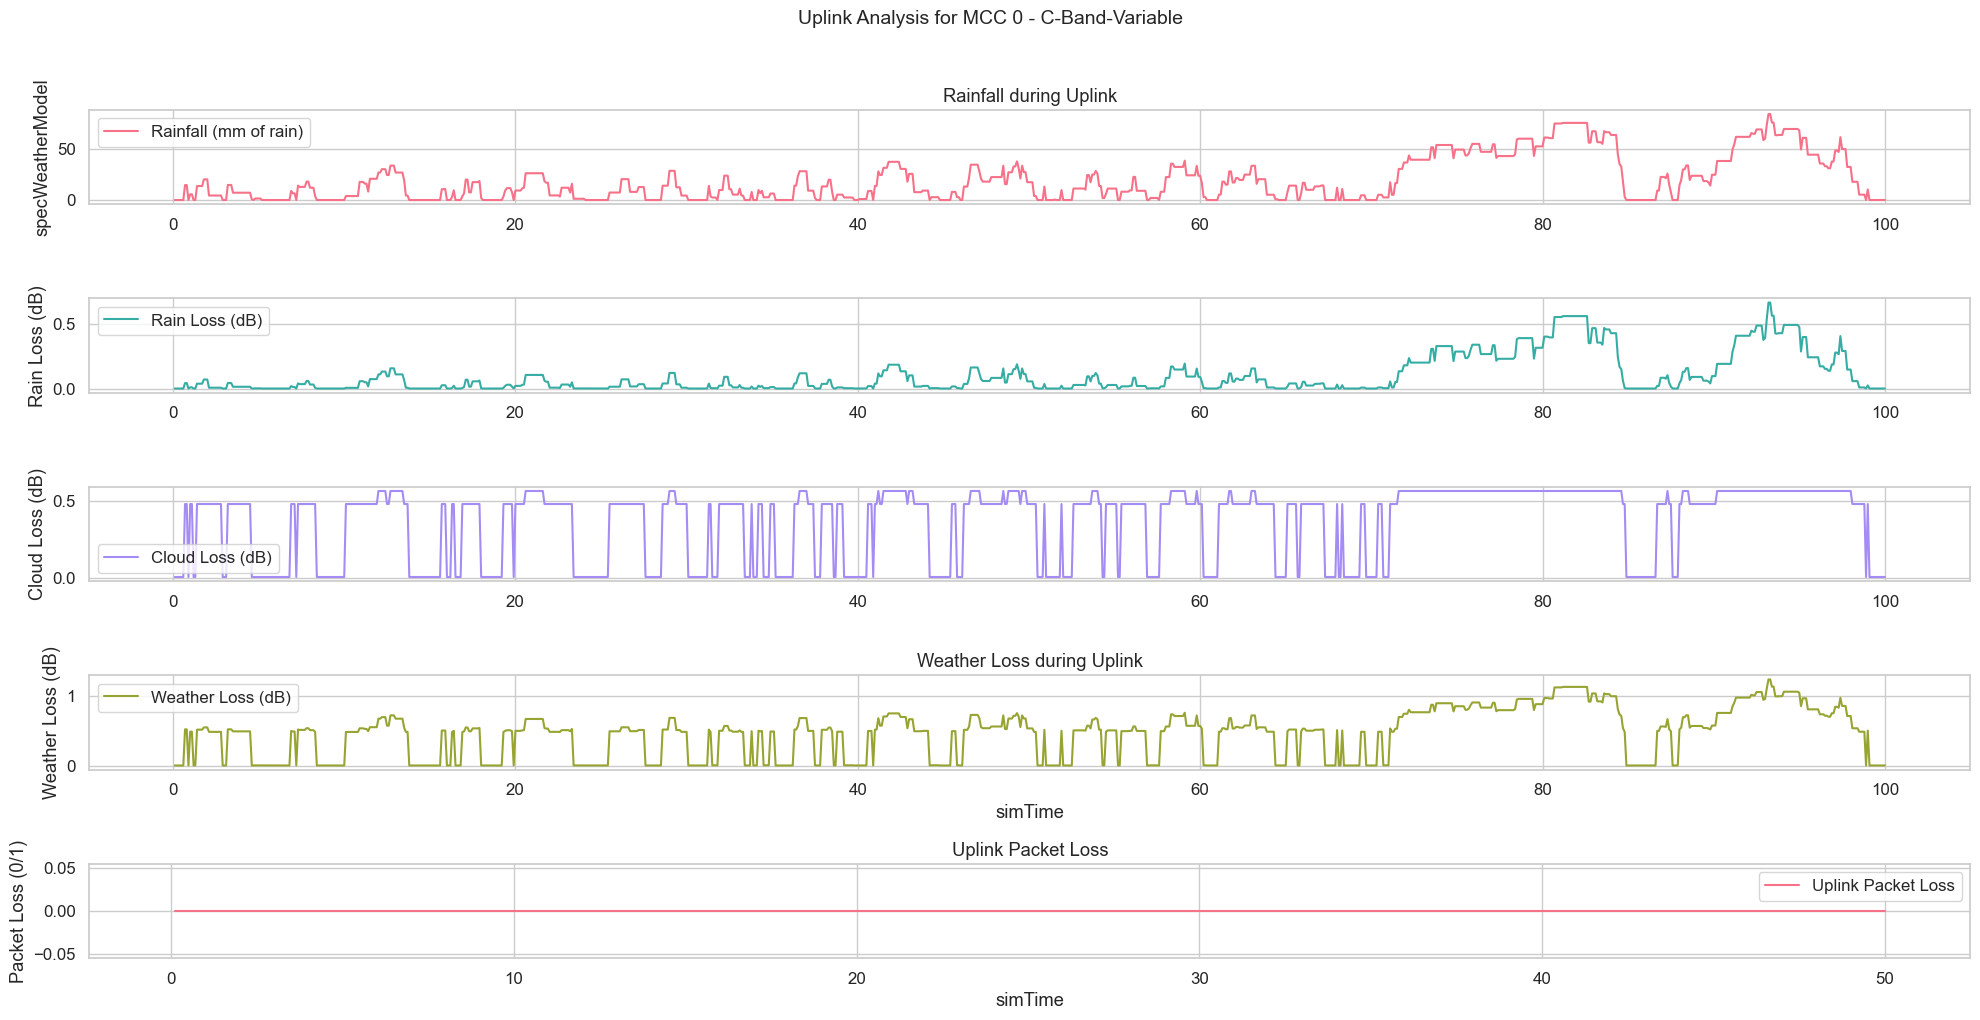

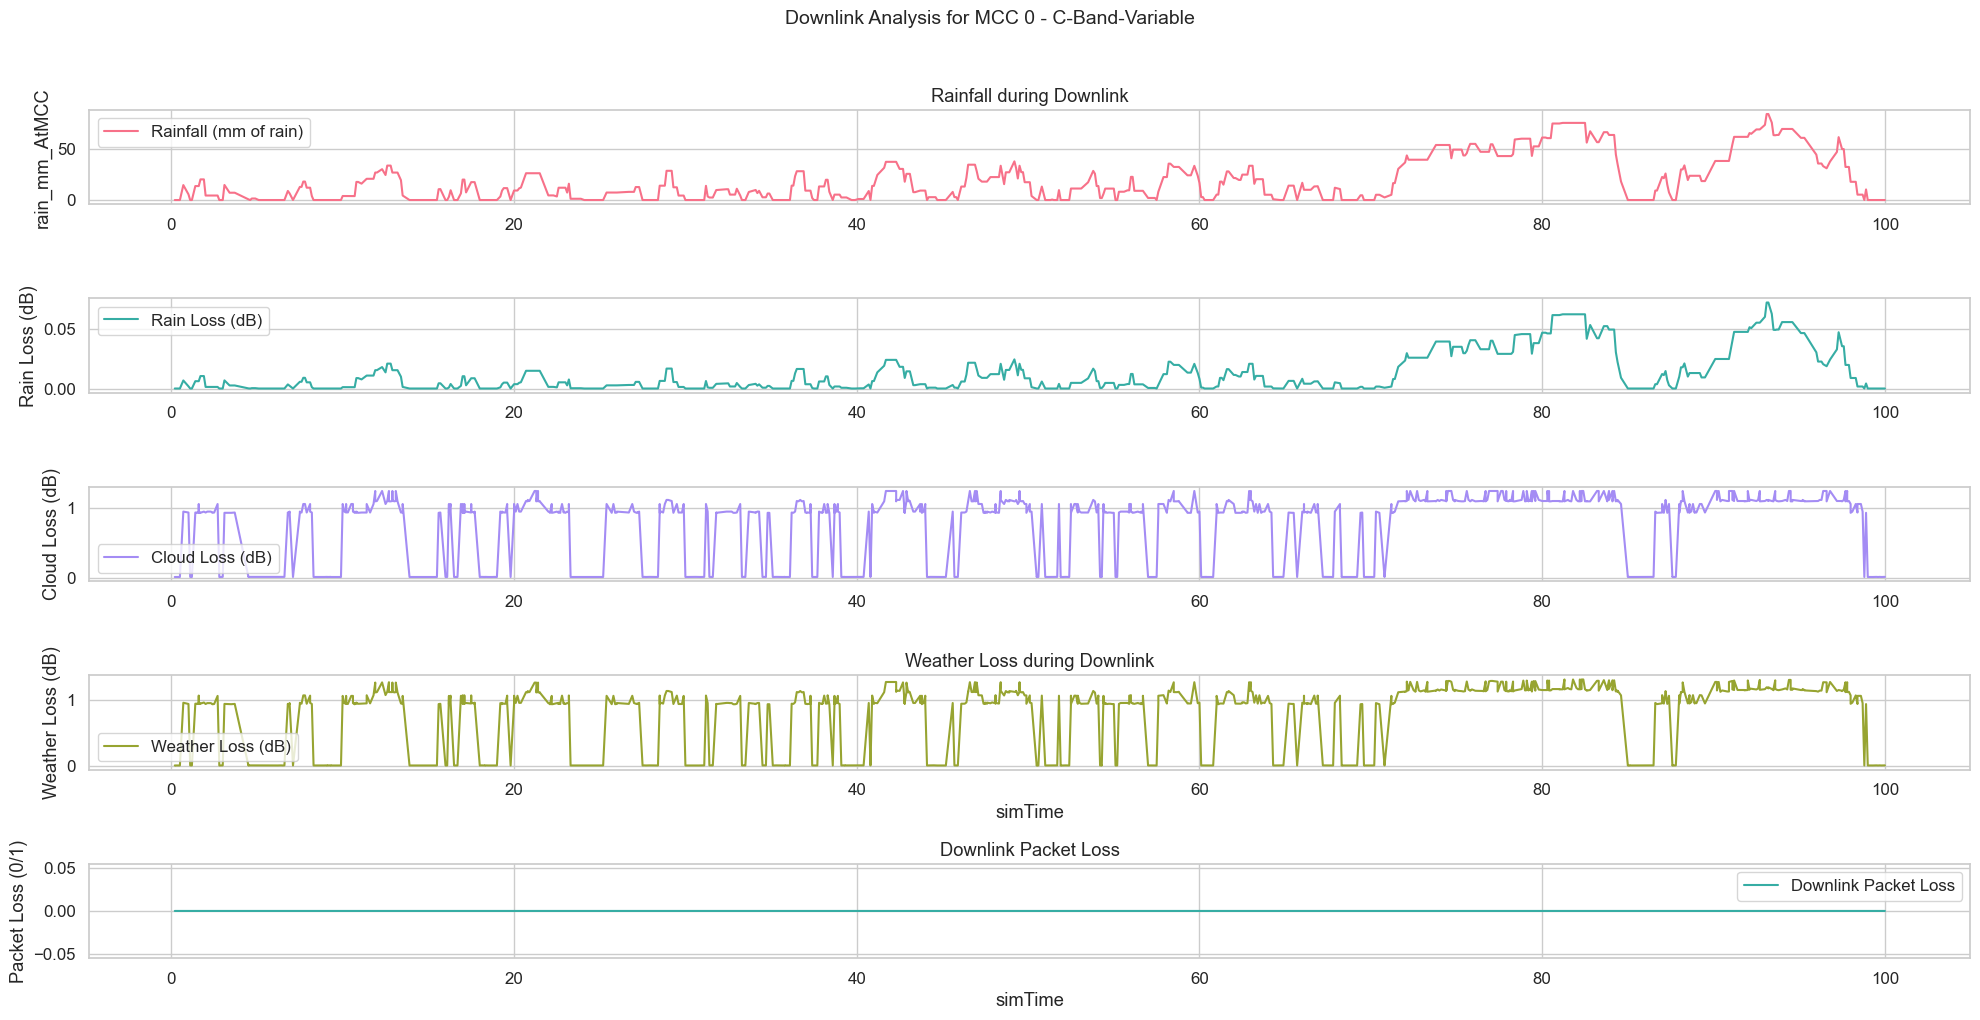

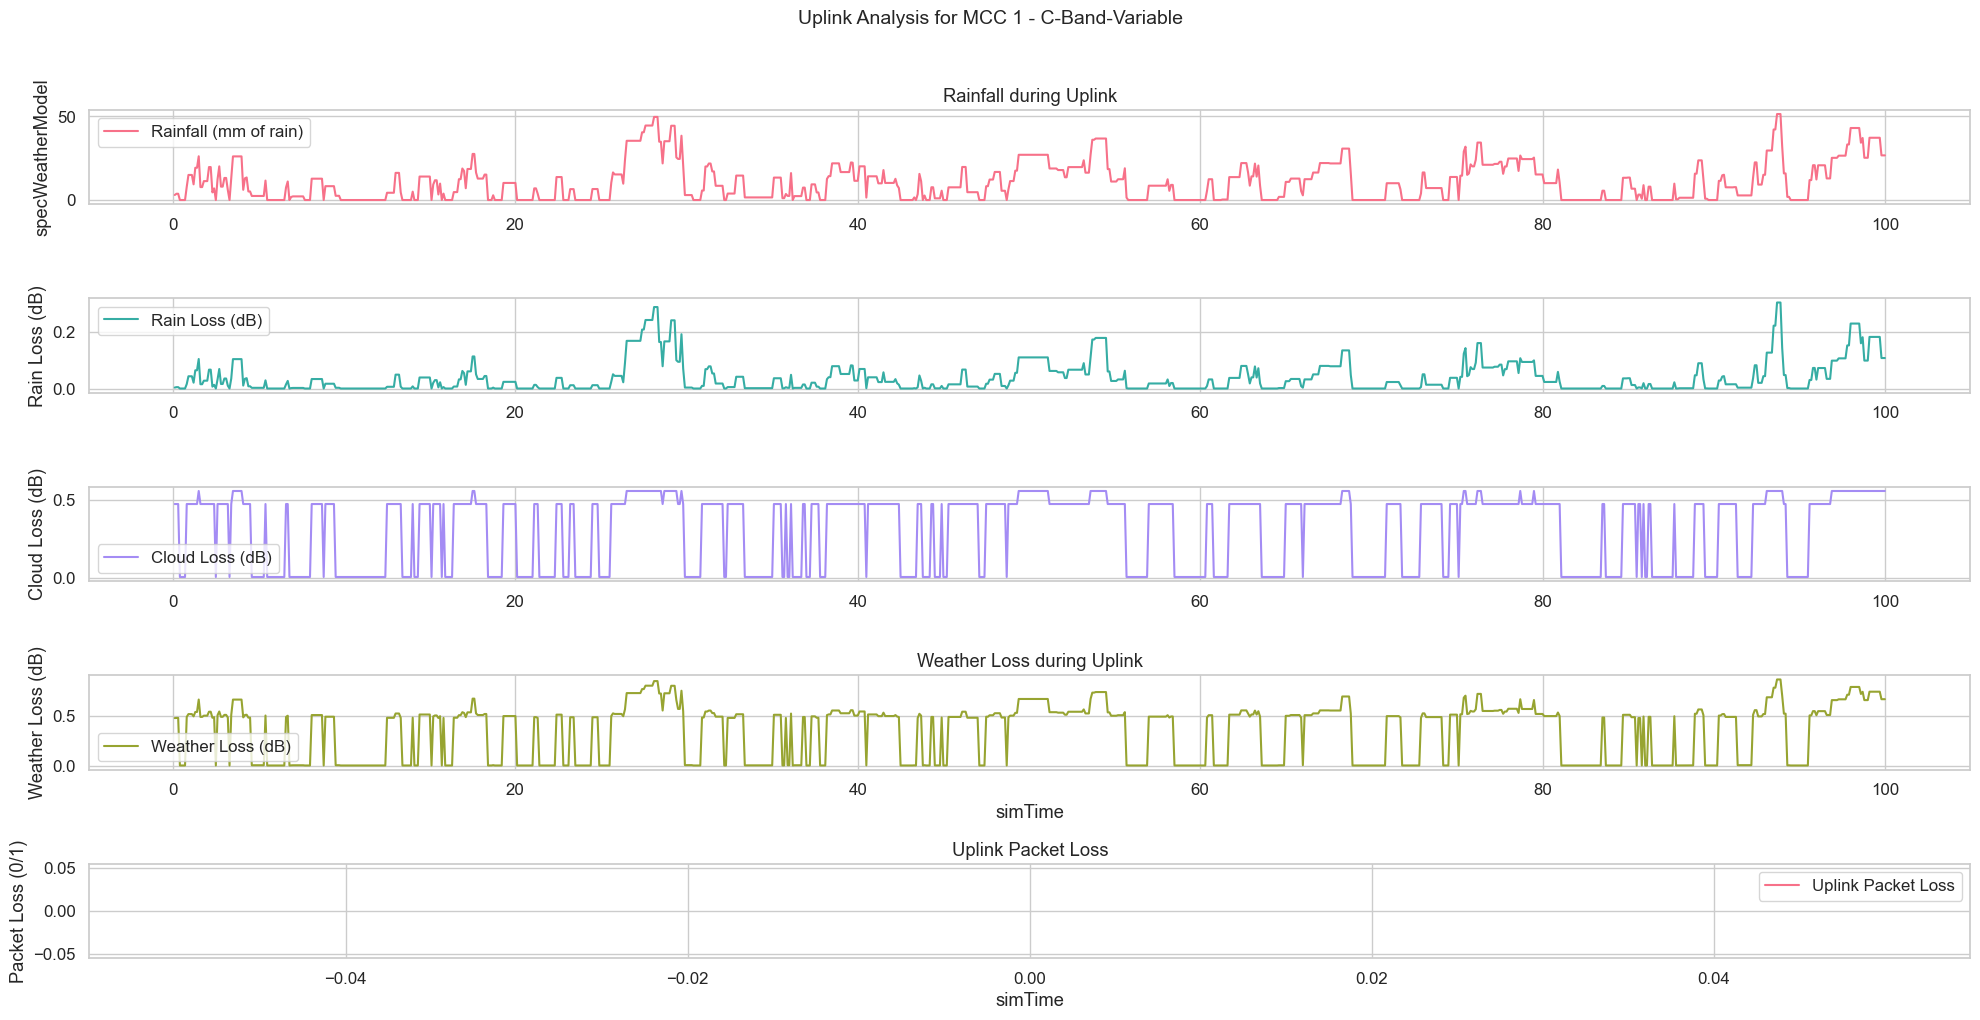

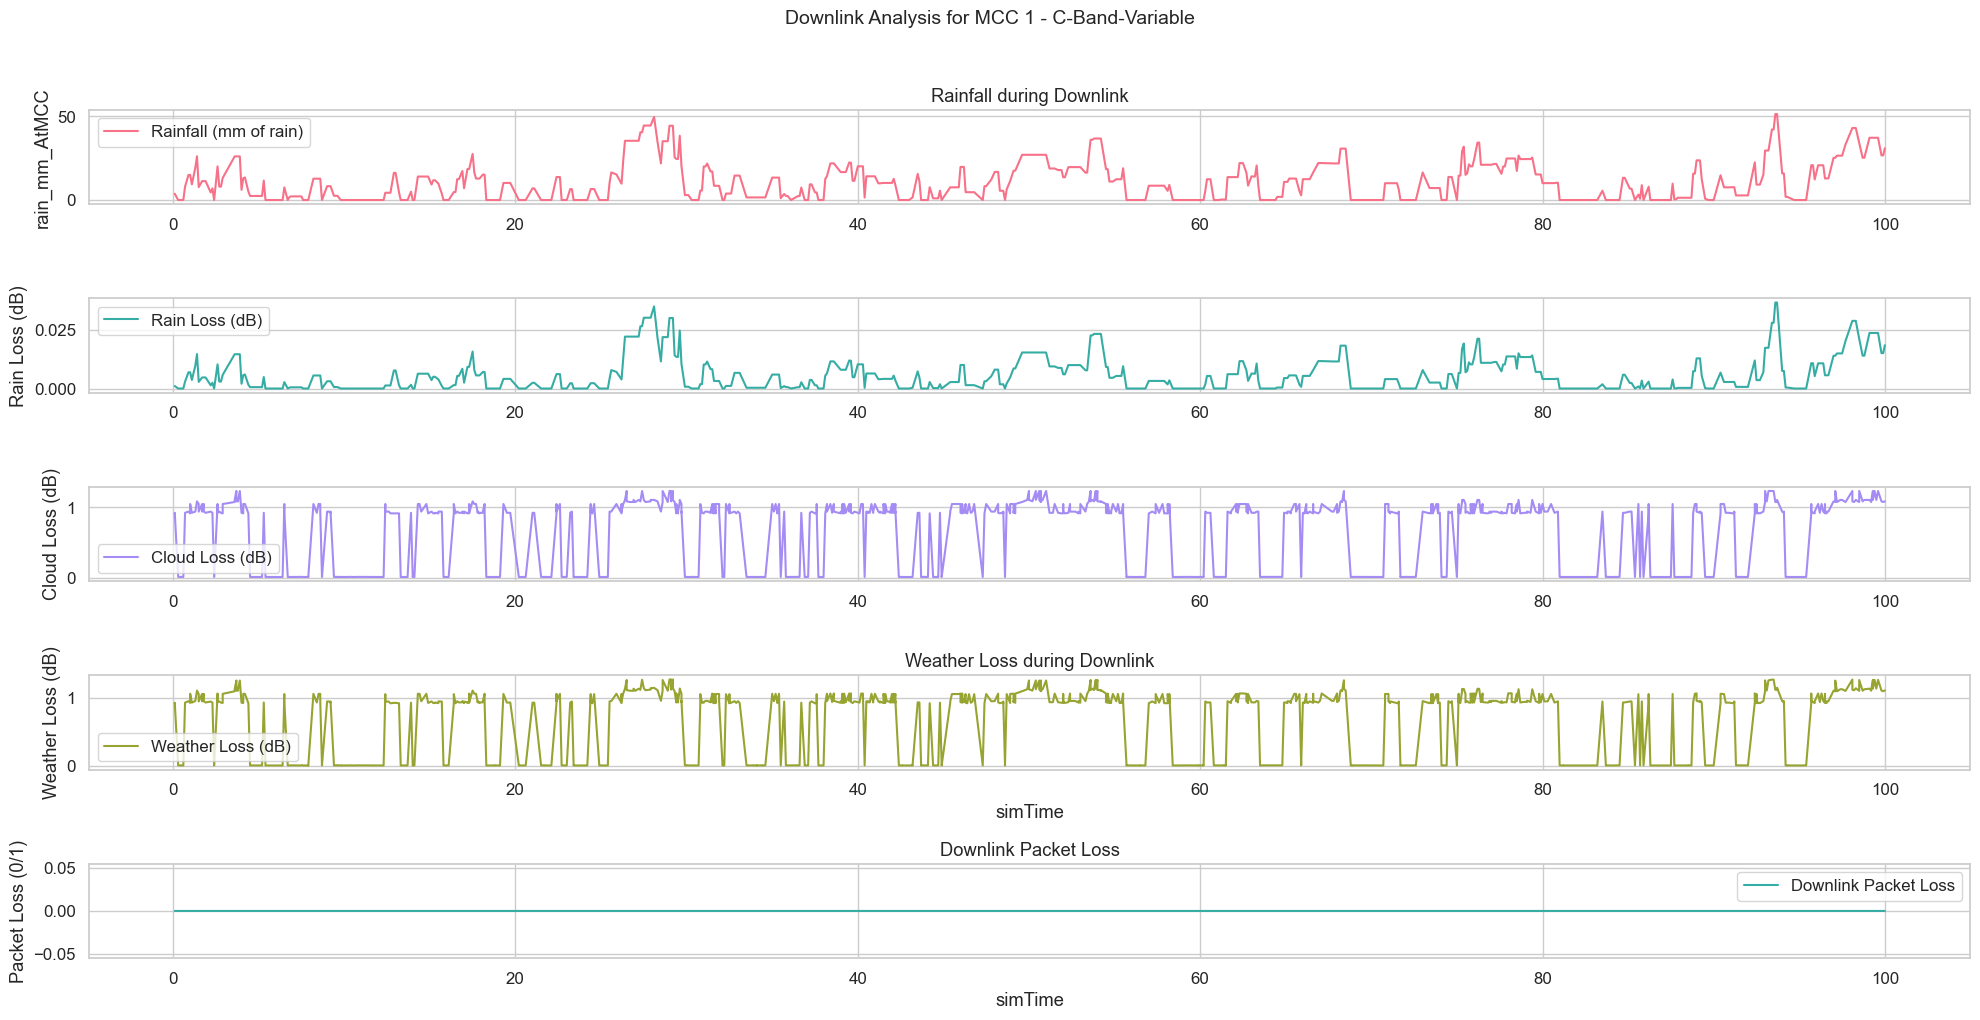

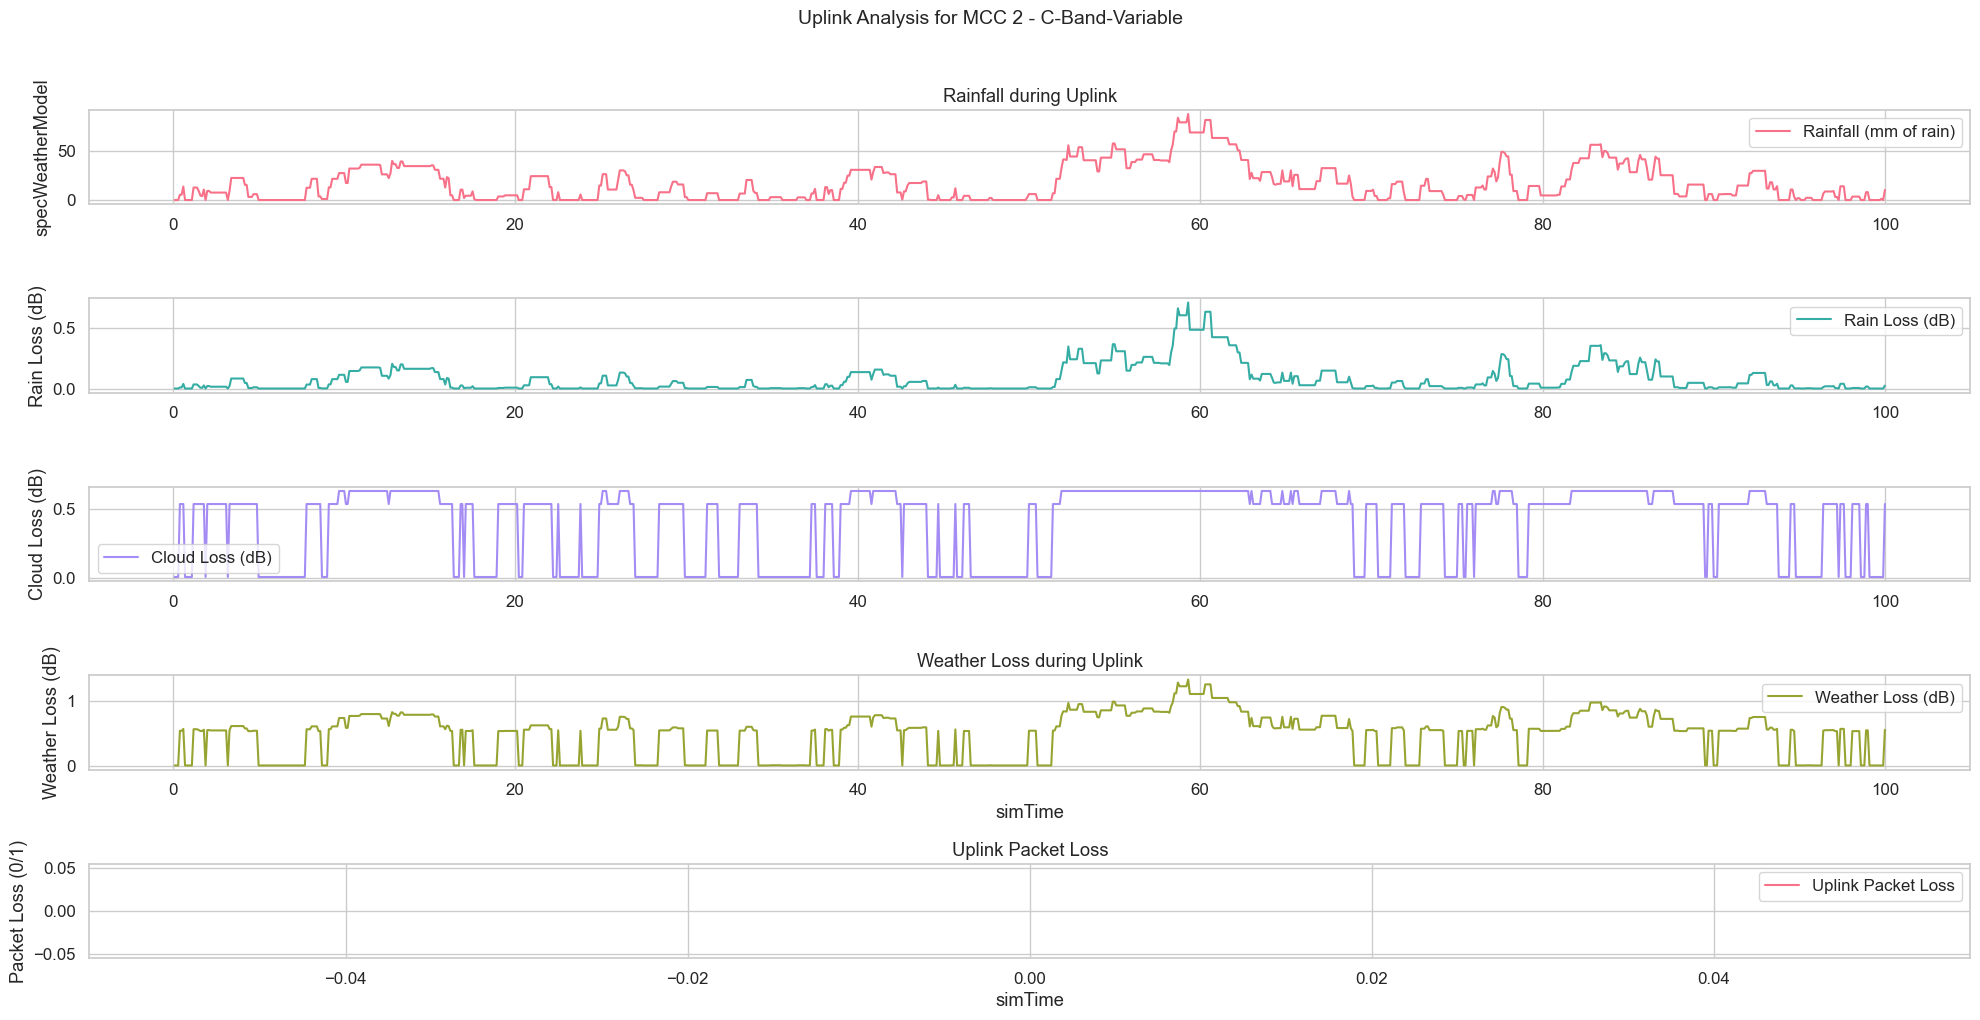

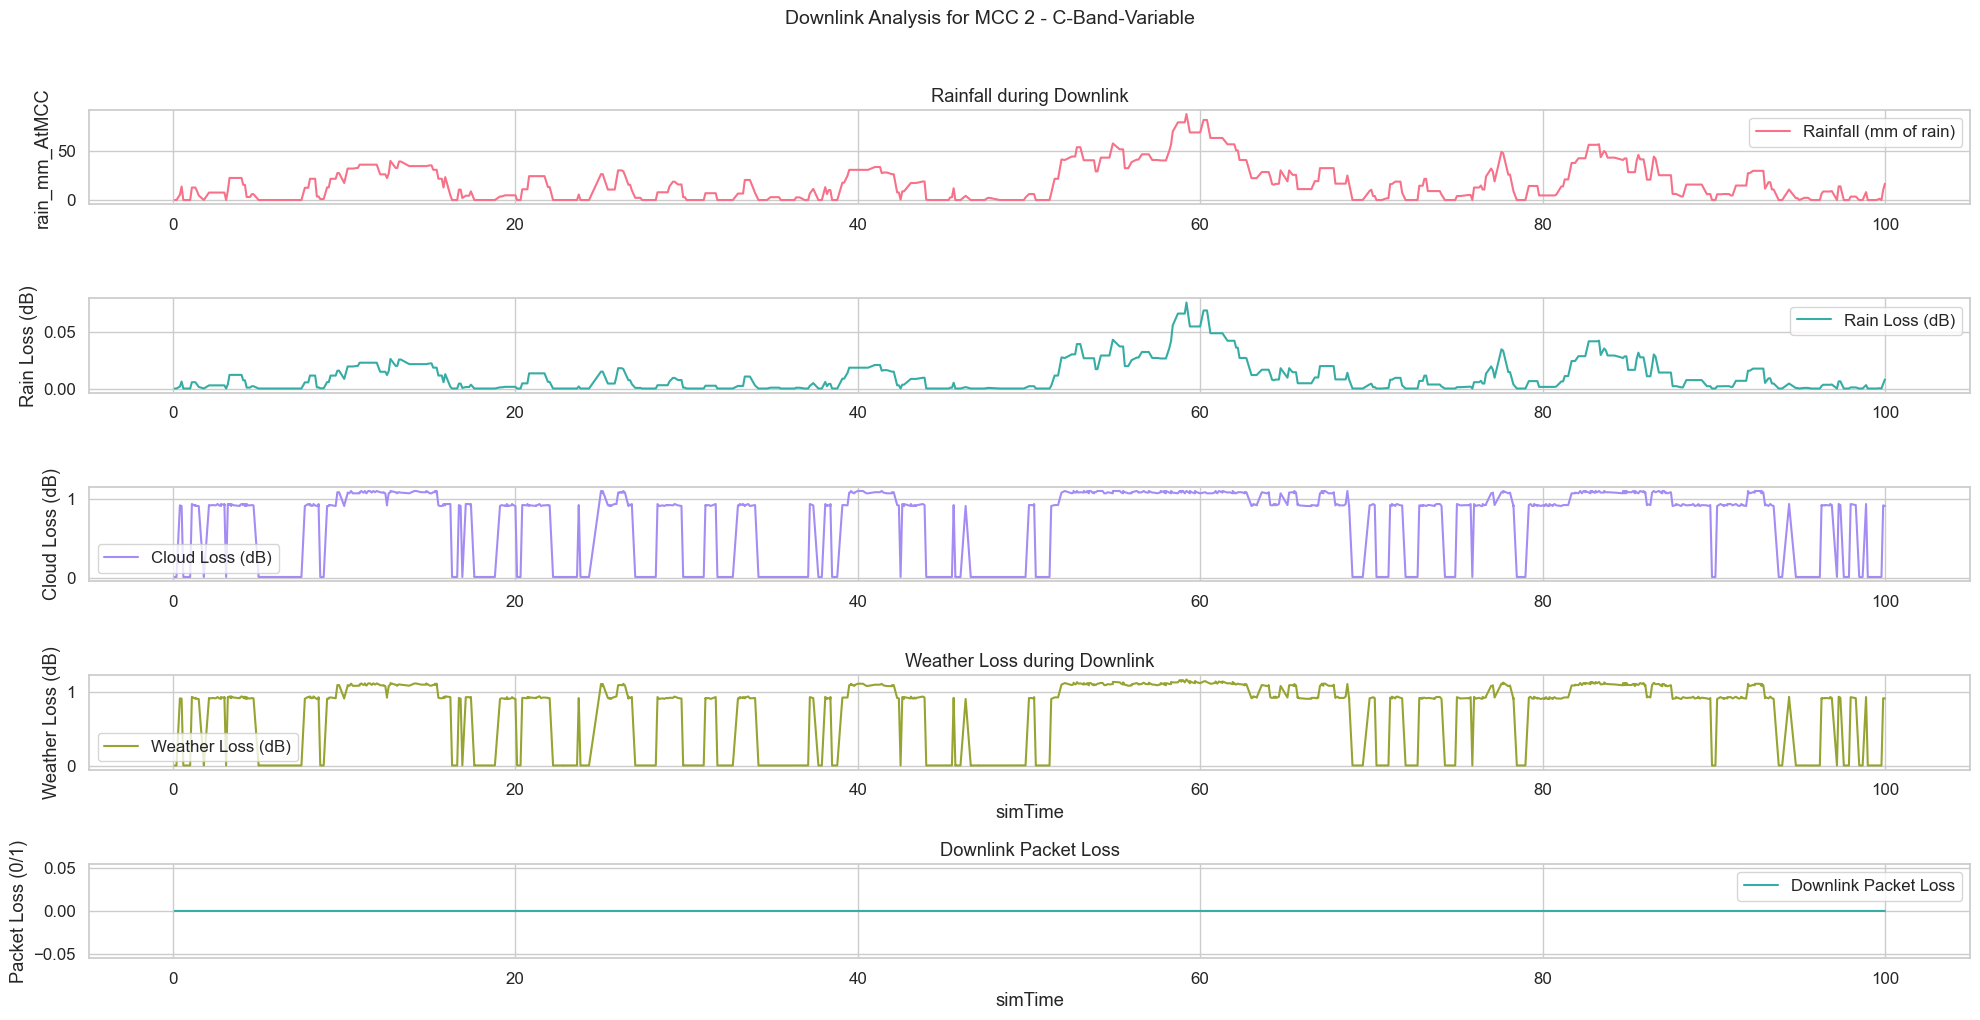

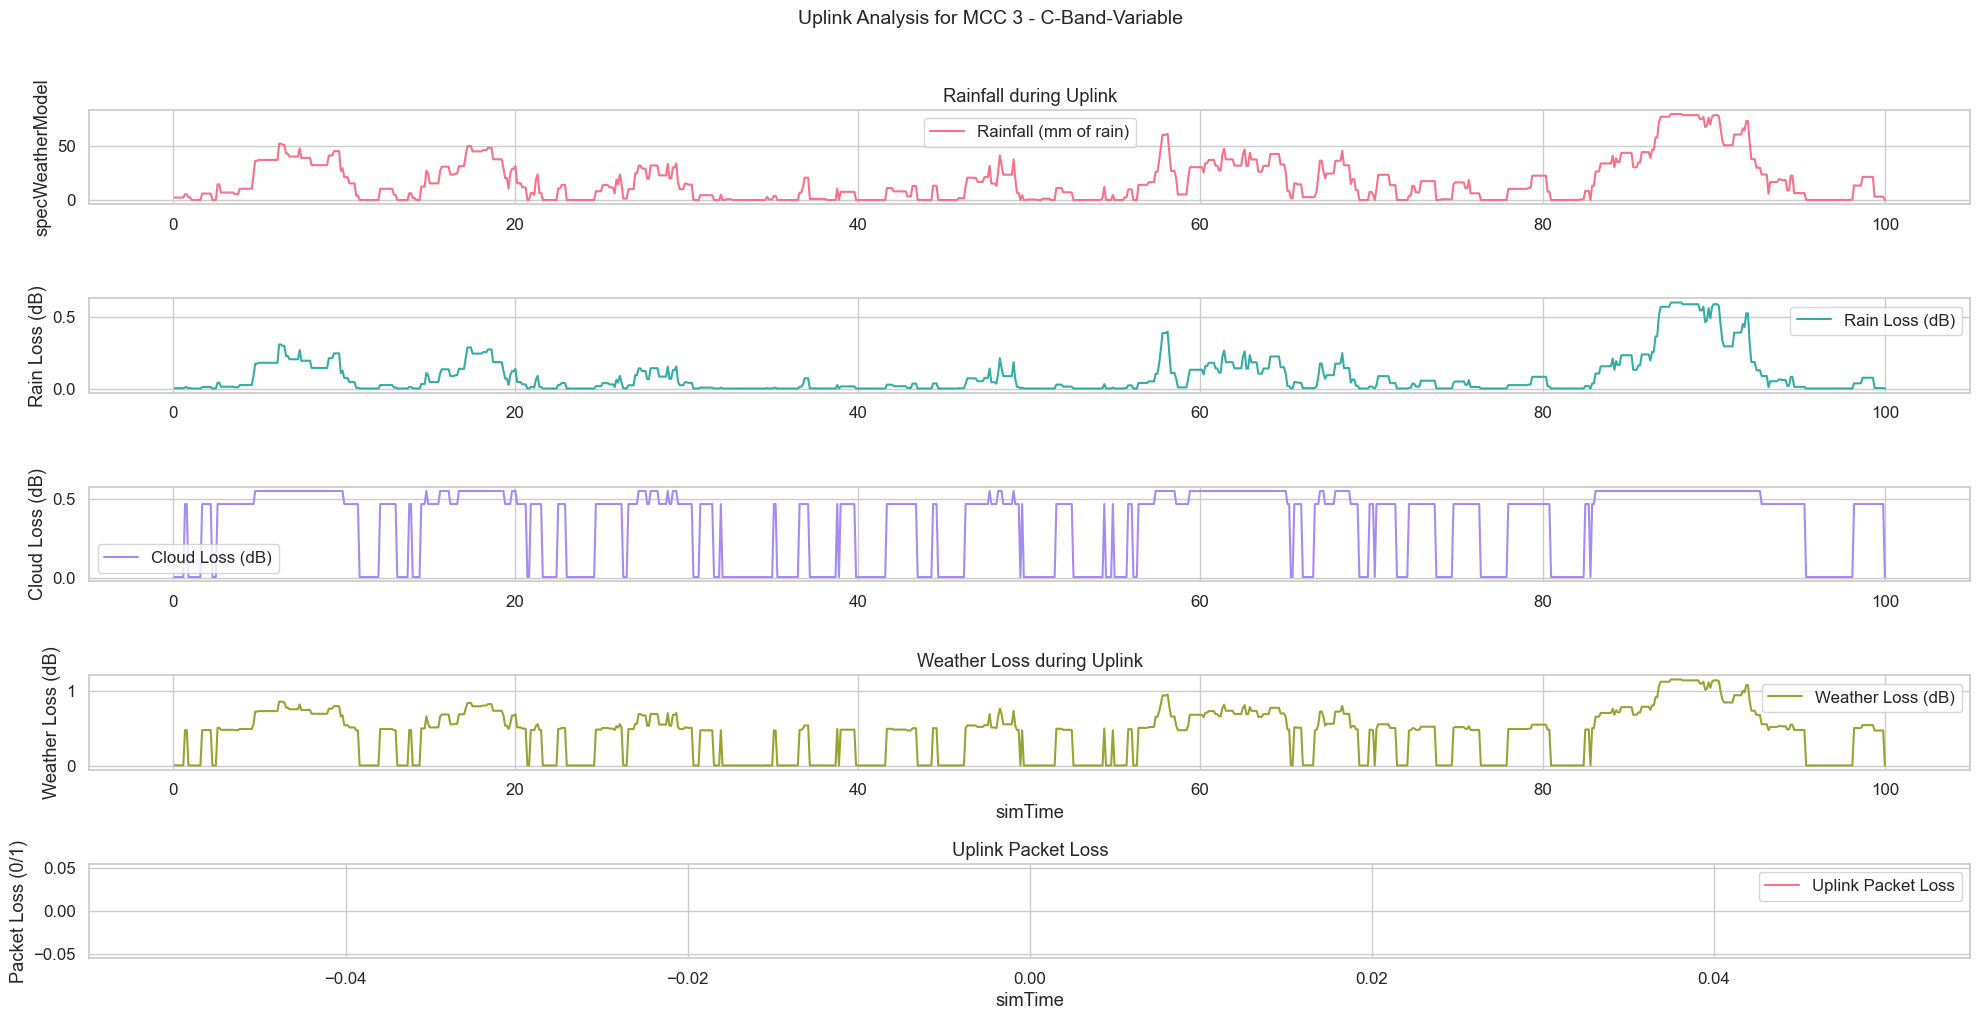

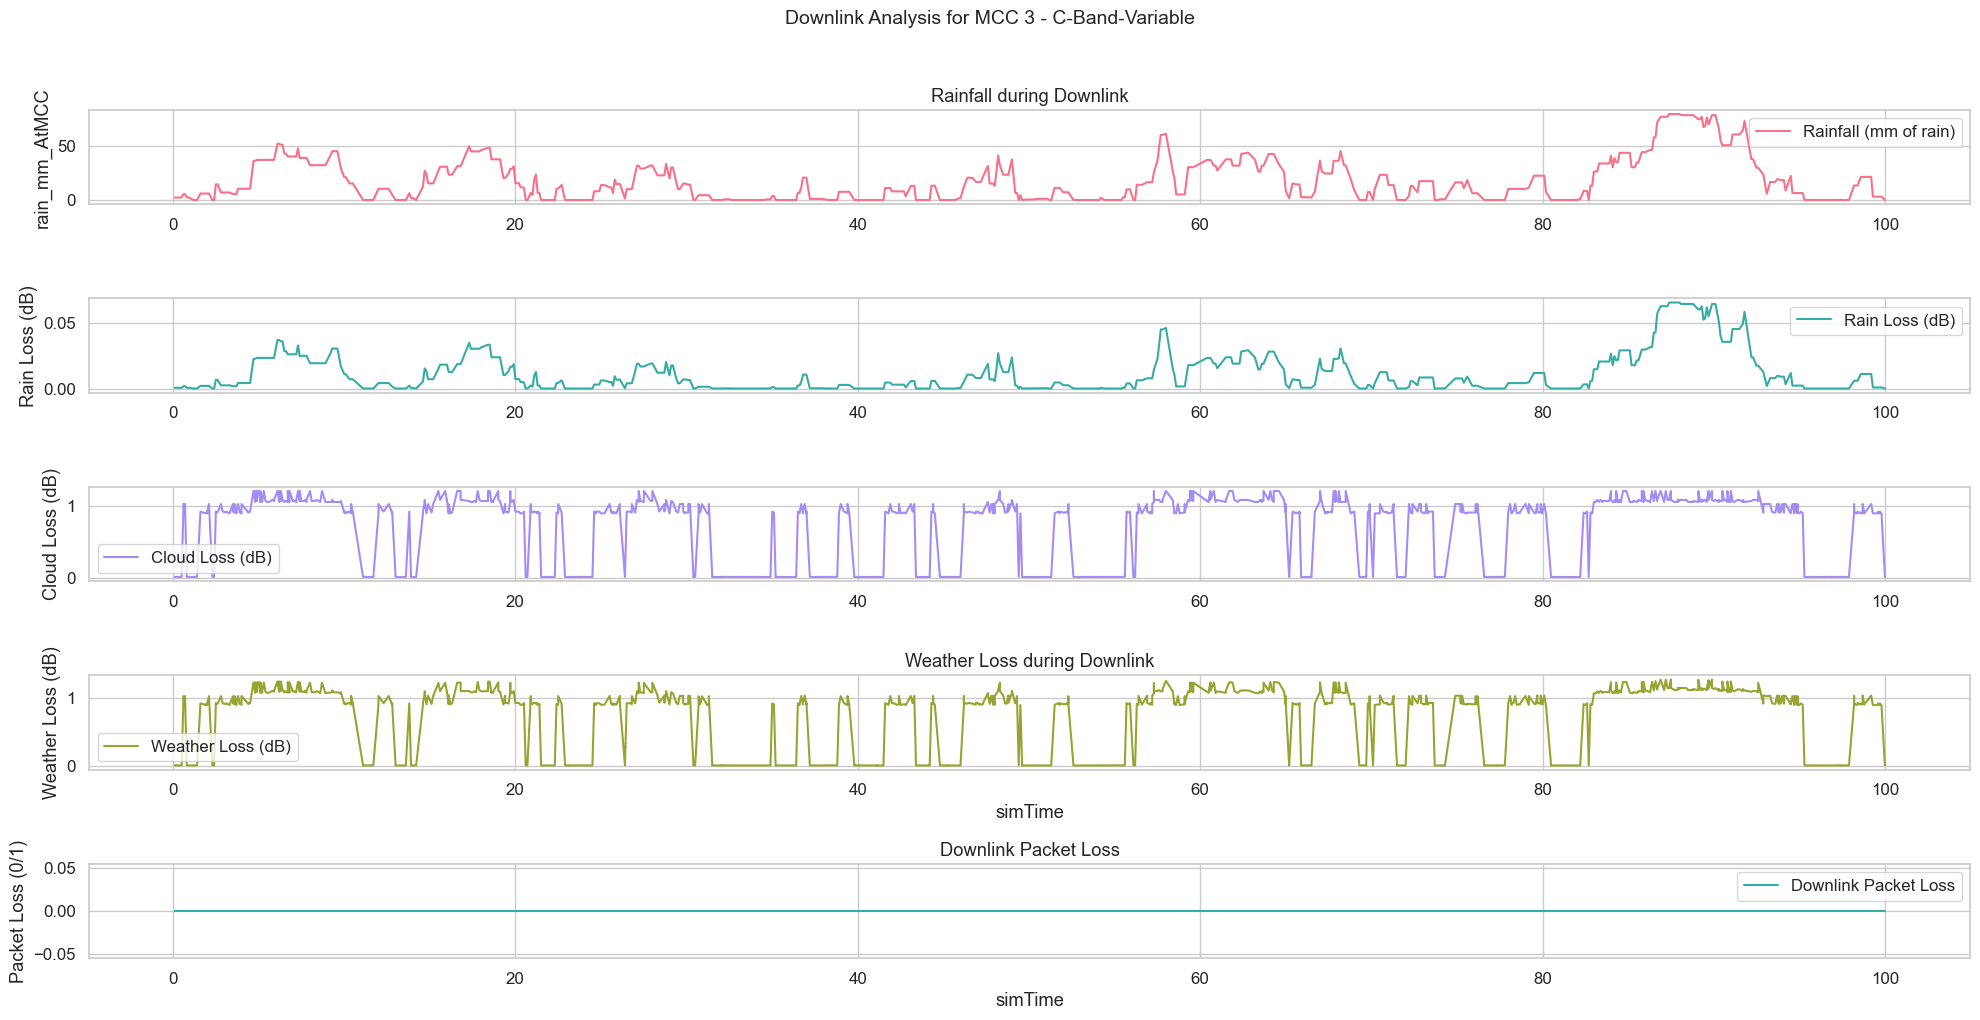

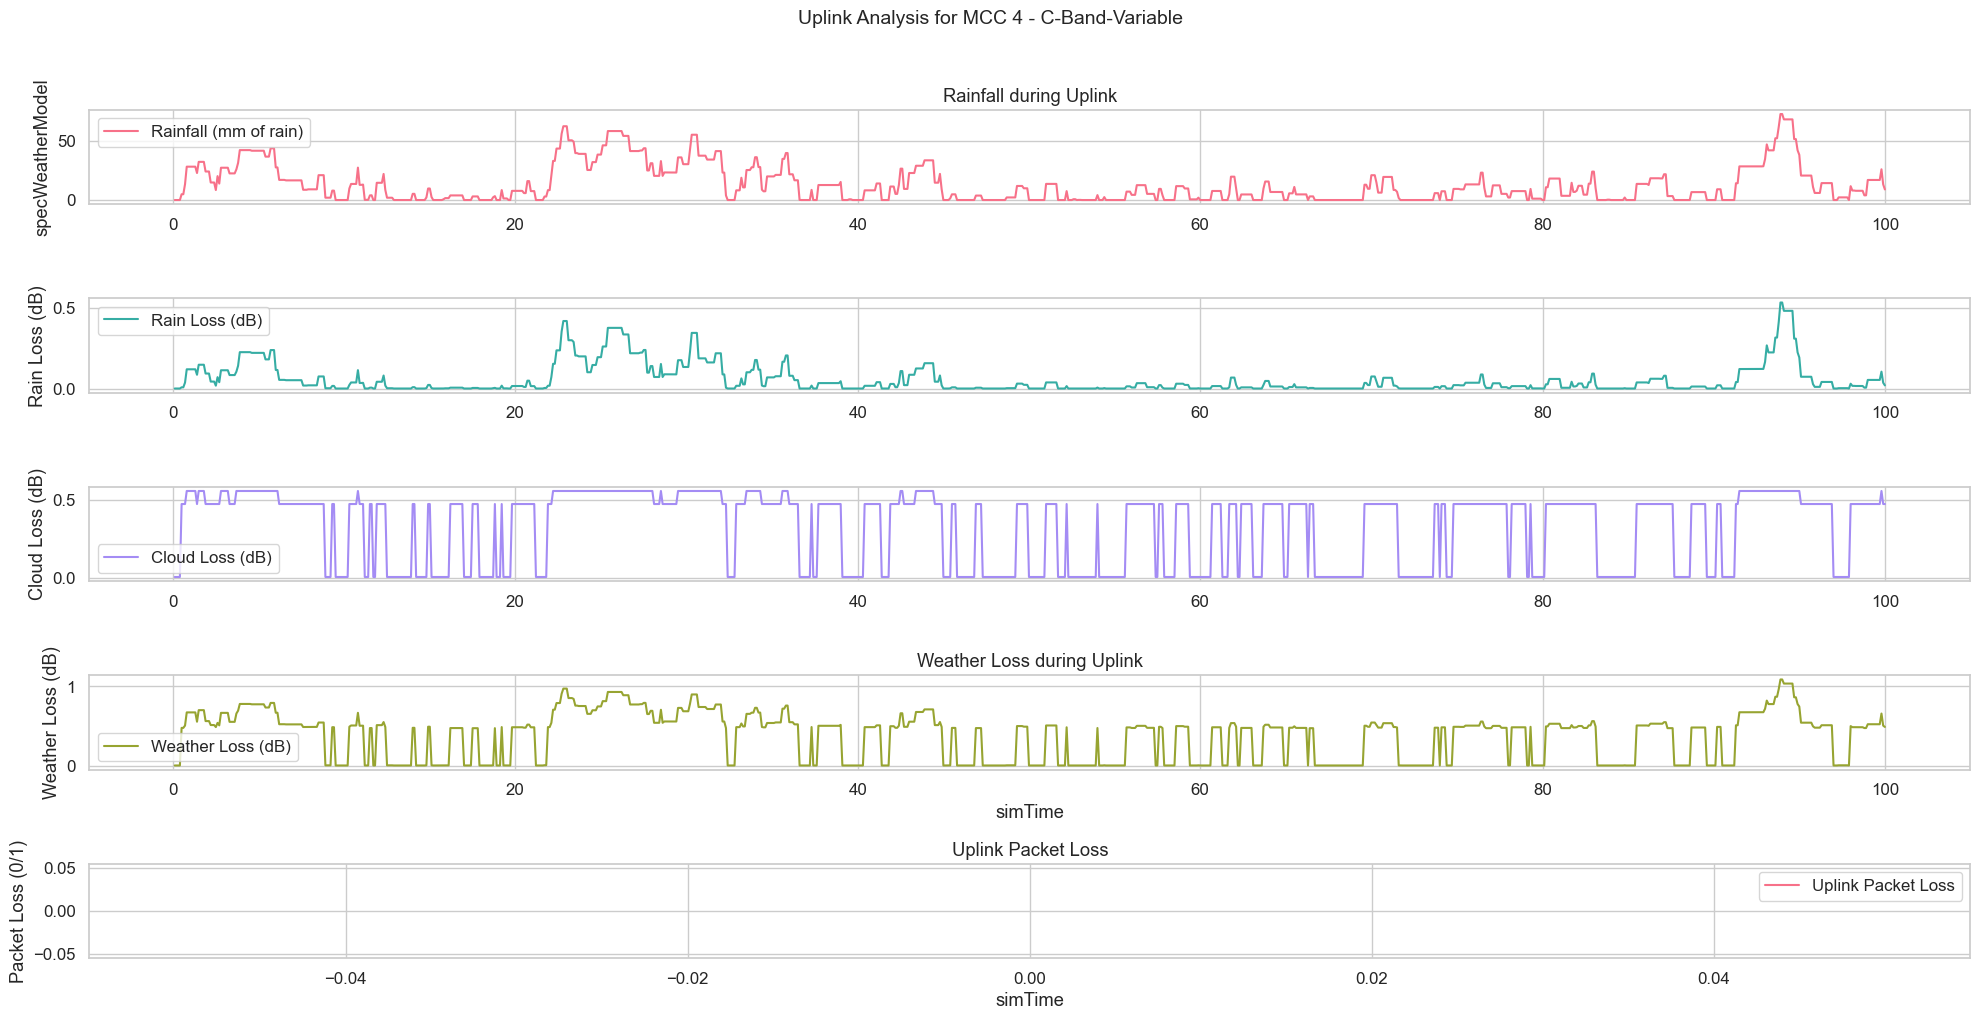

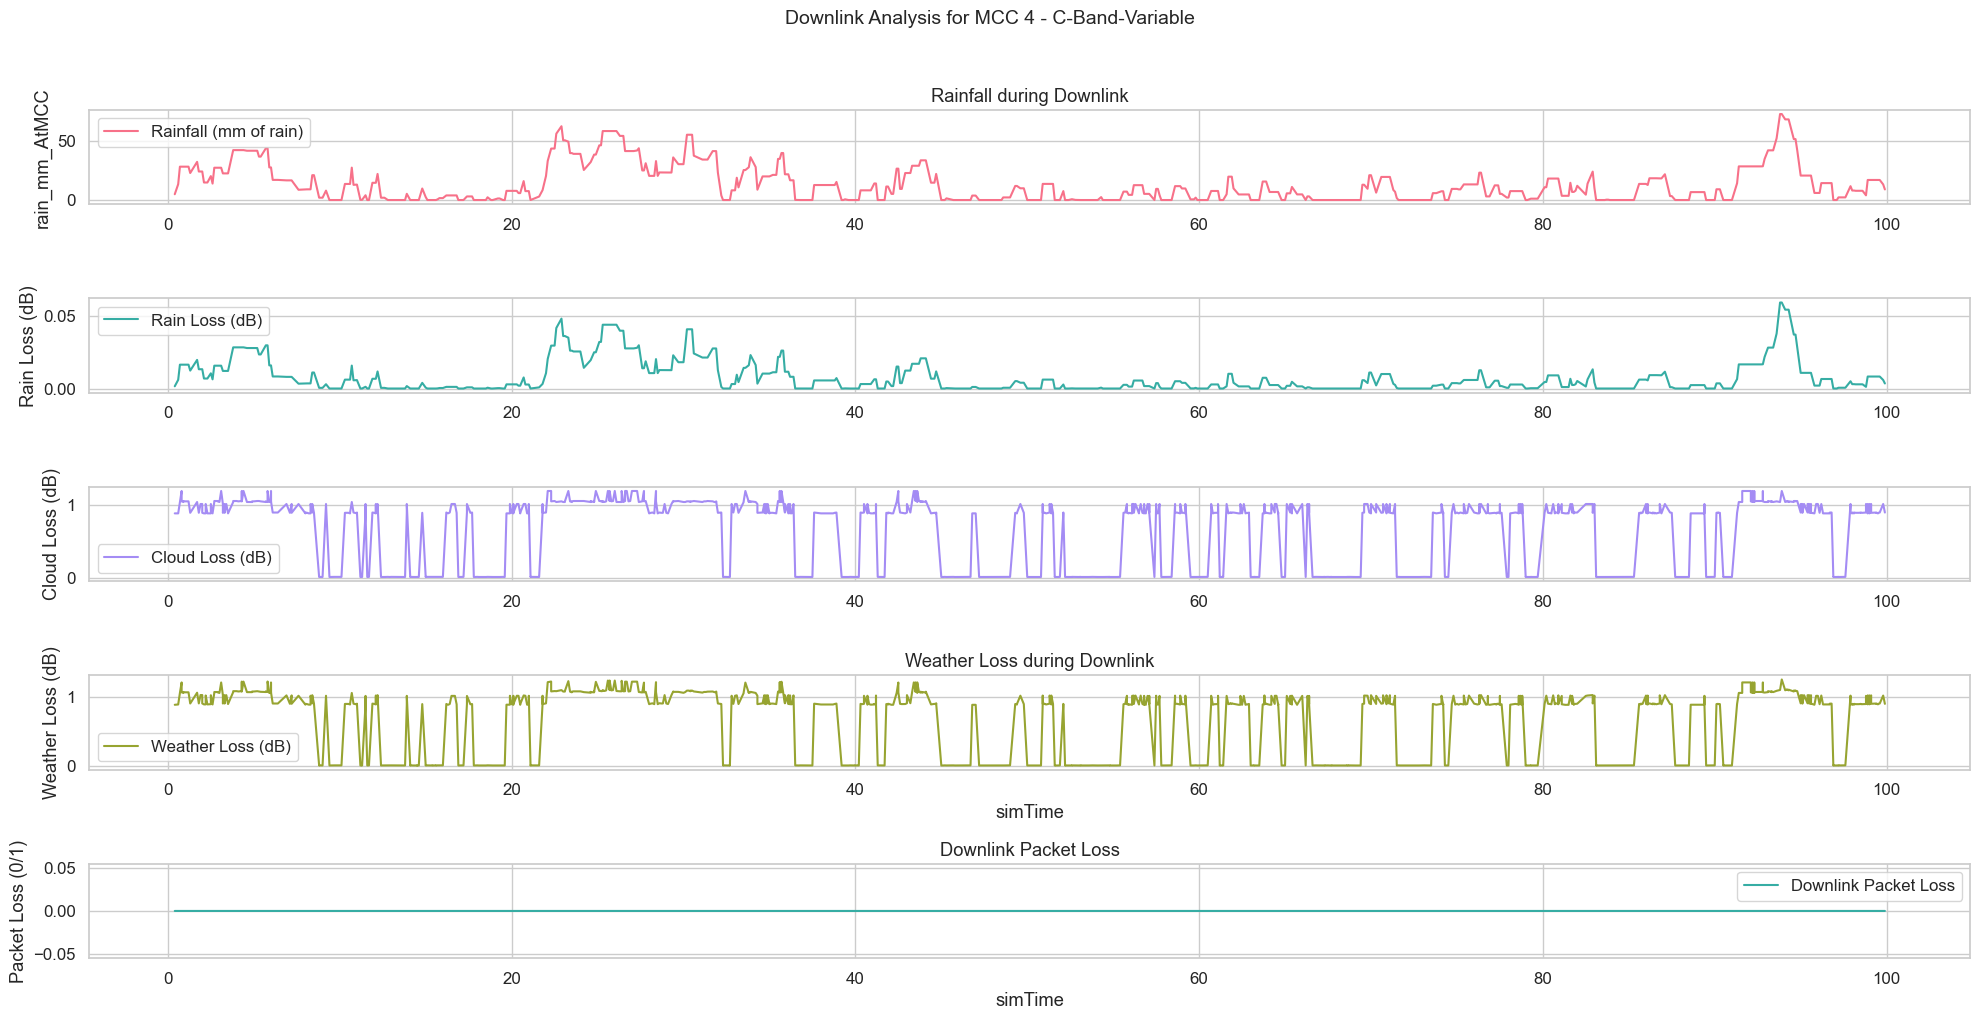

In [47]:
read_and_plot_files("C-Band-Variable")

## Ku-Band

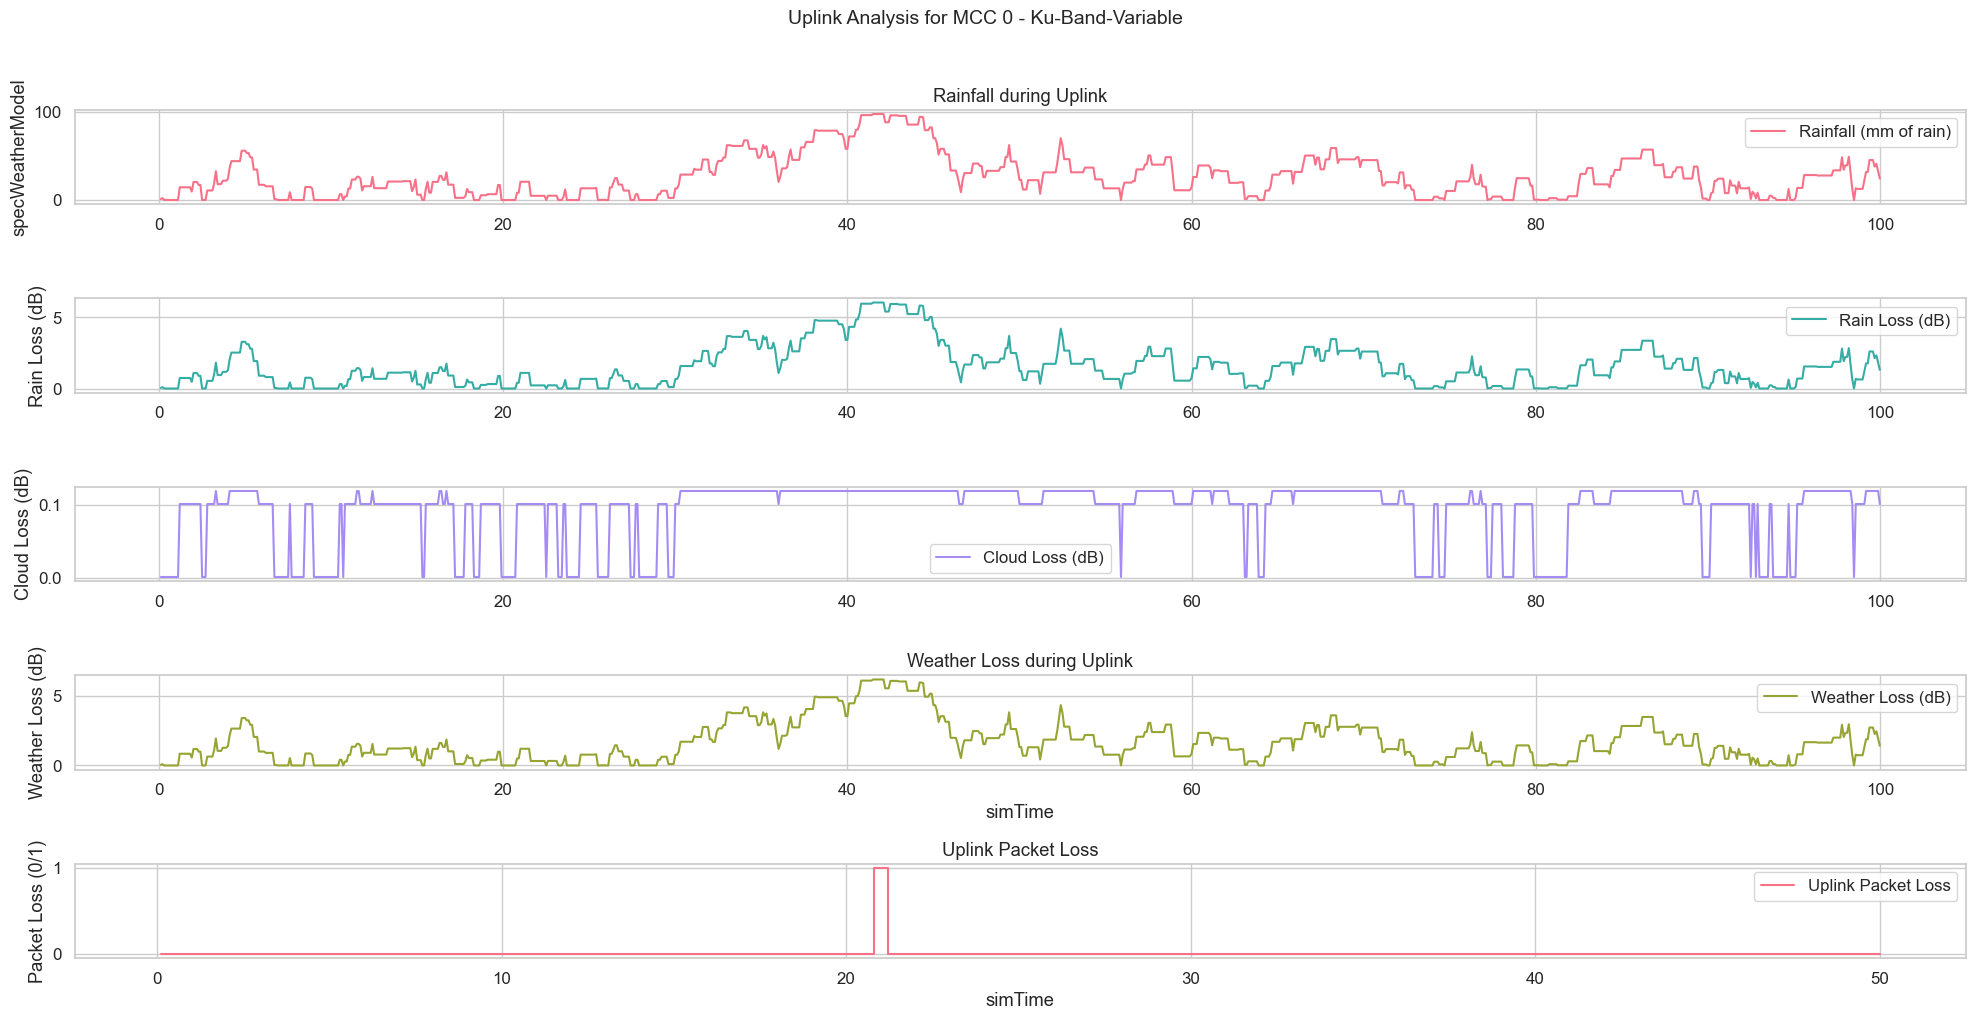

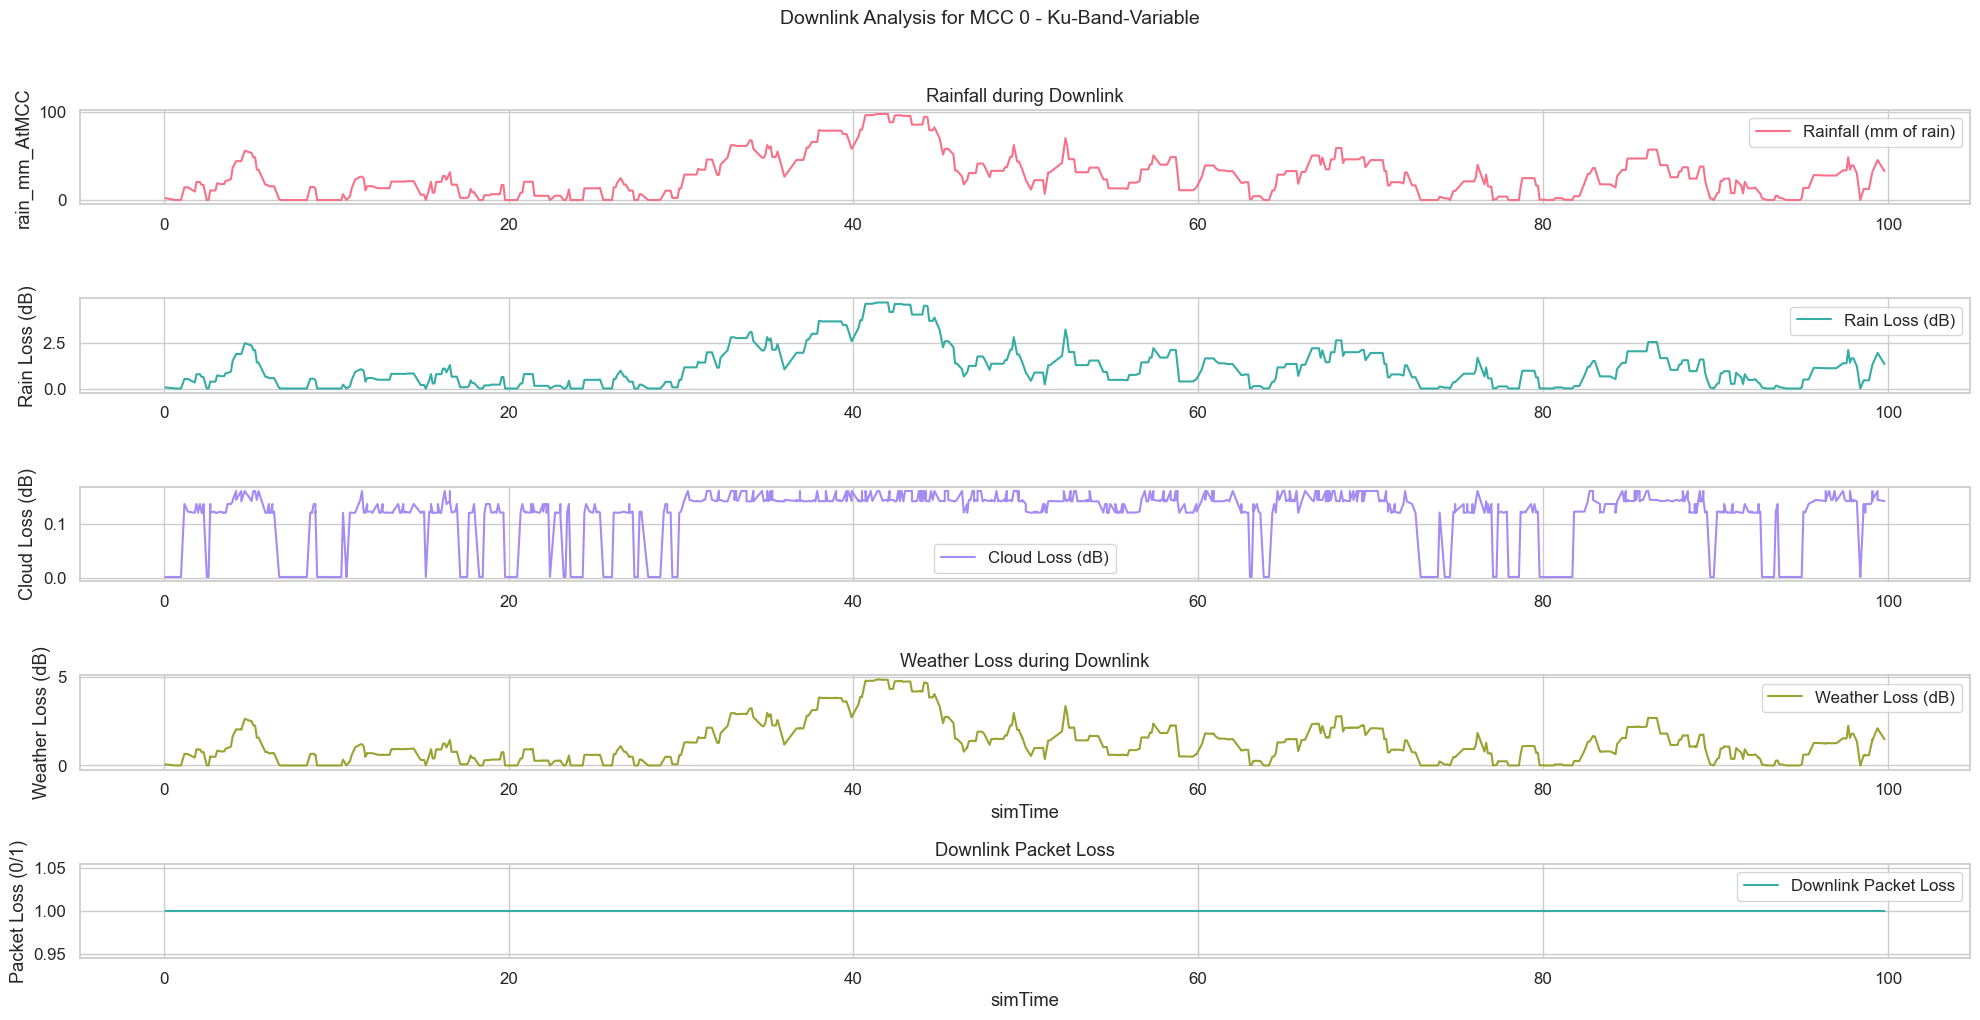

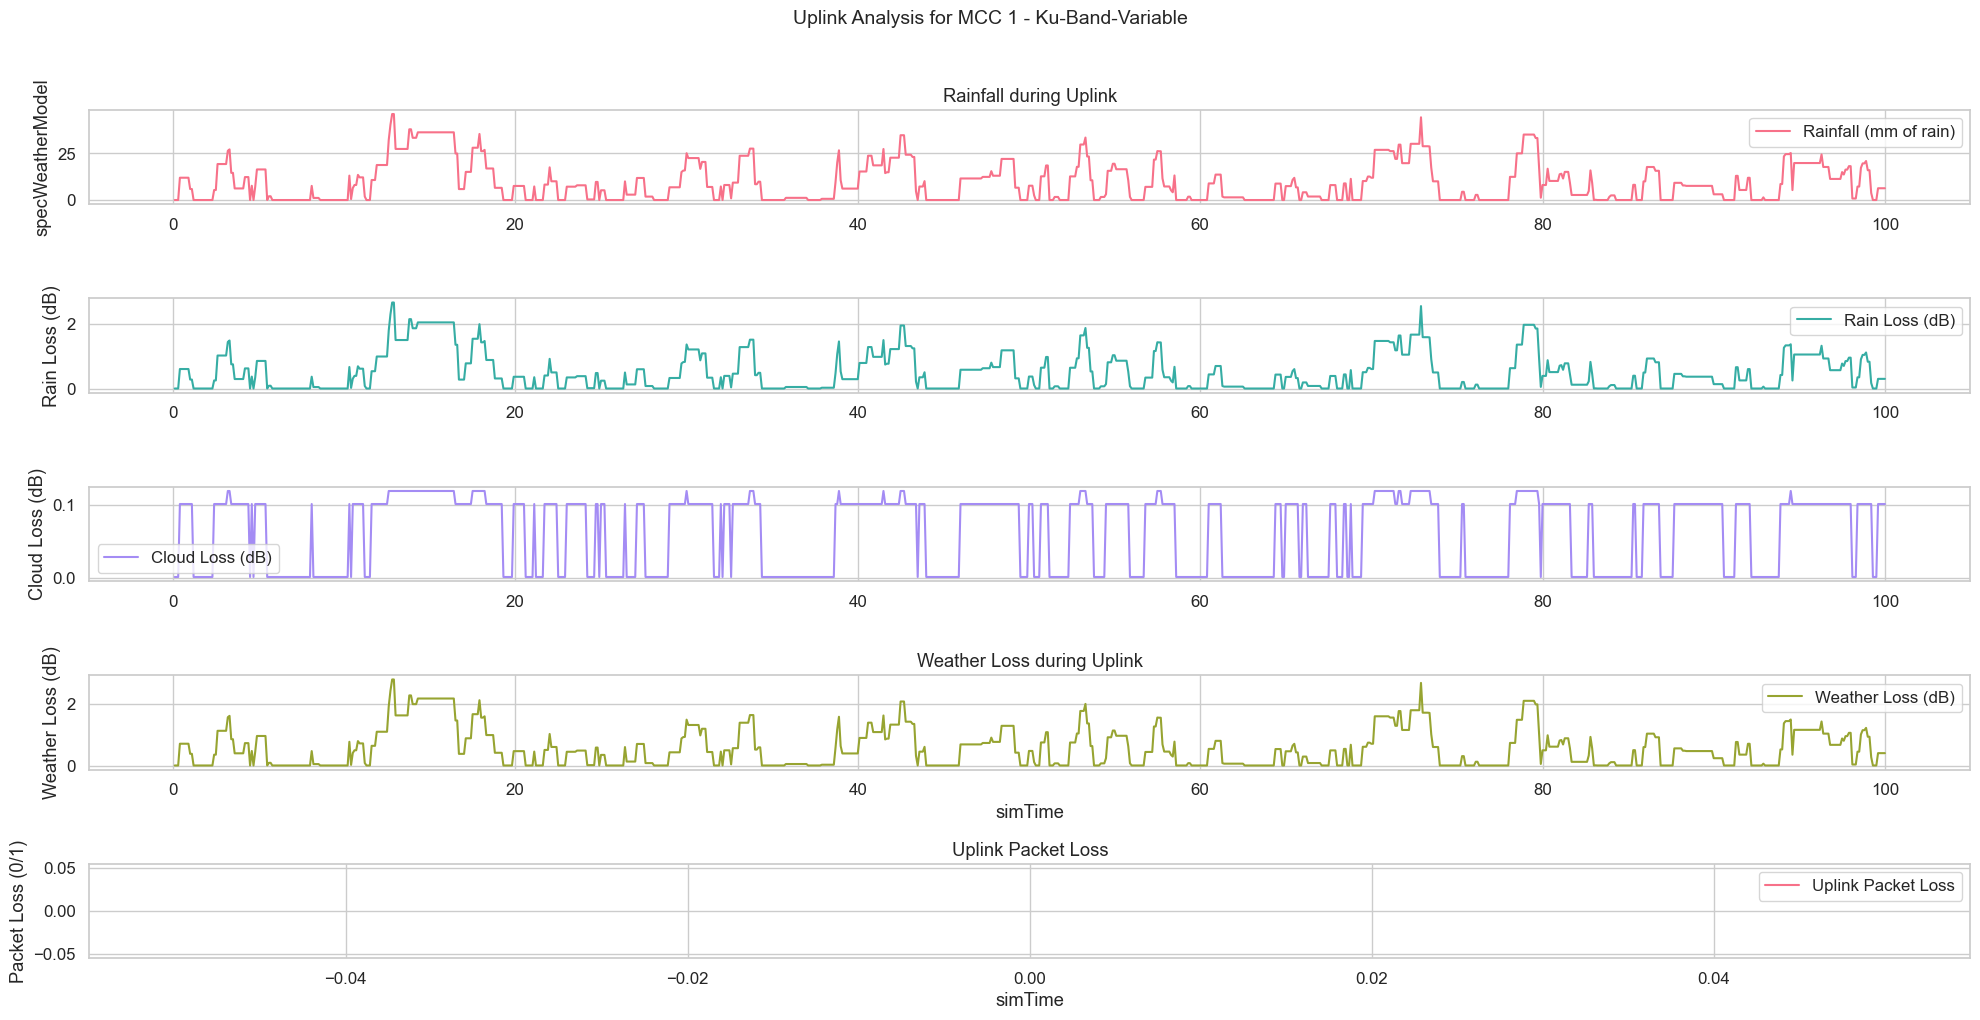

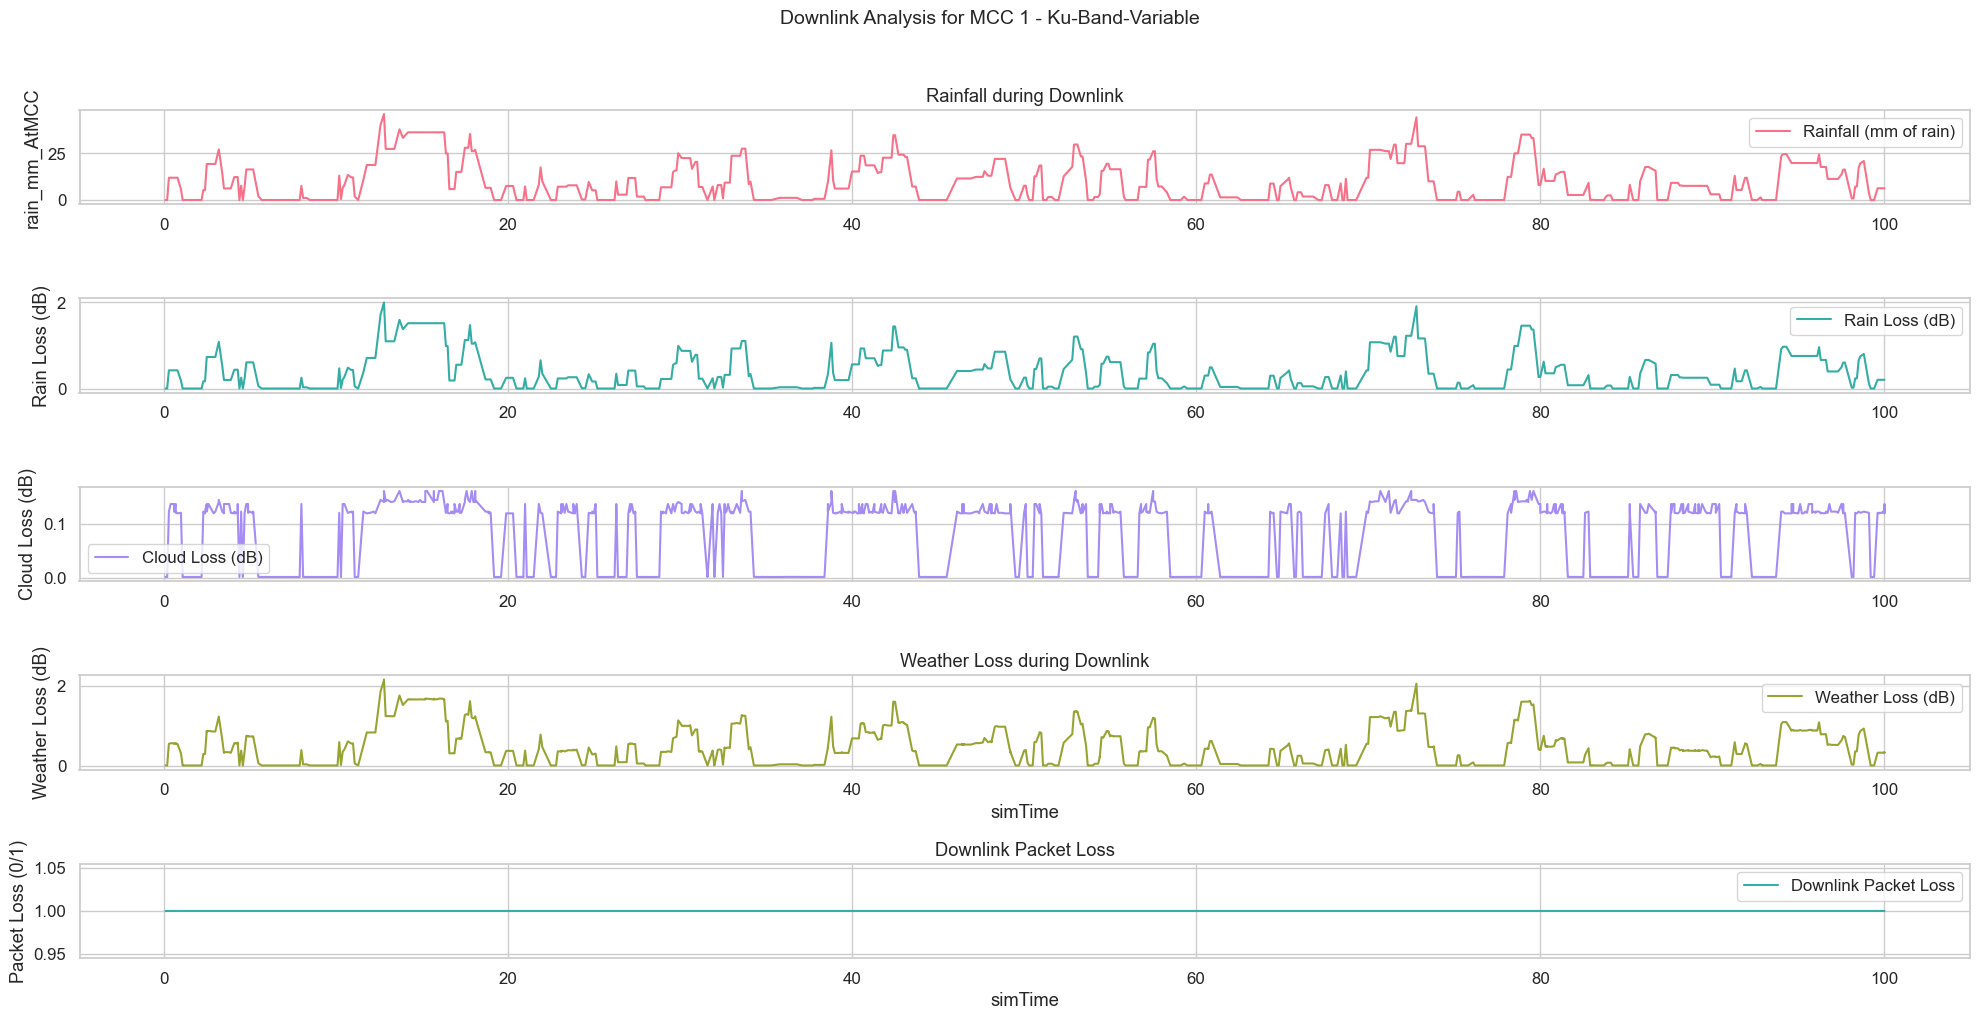

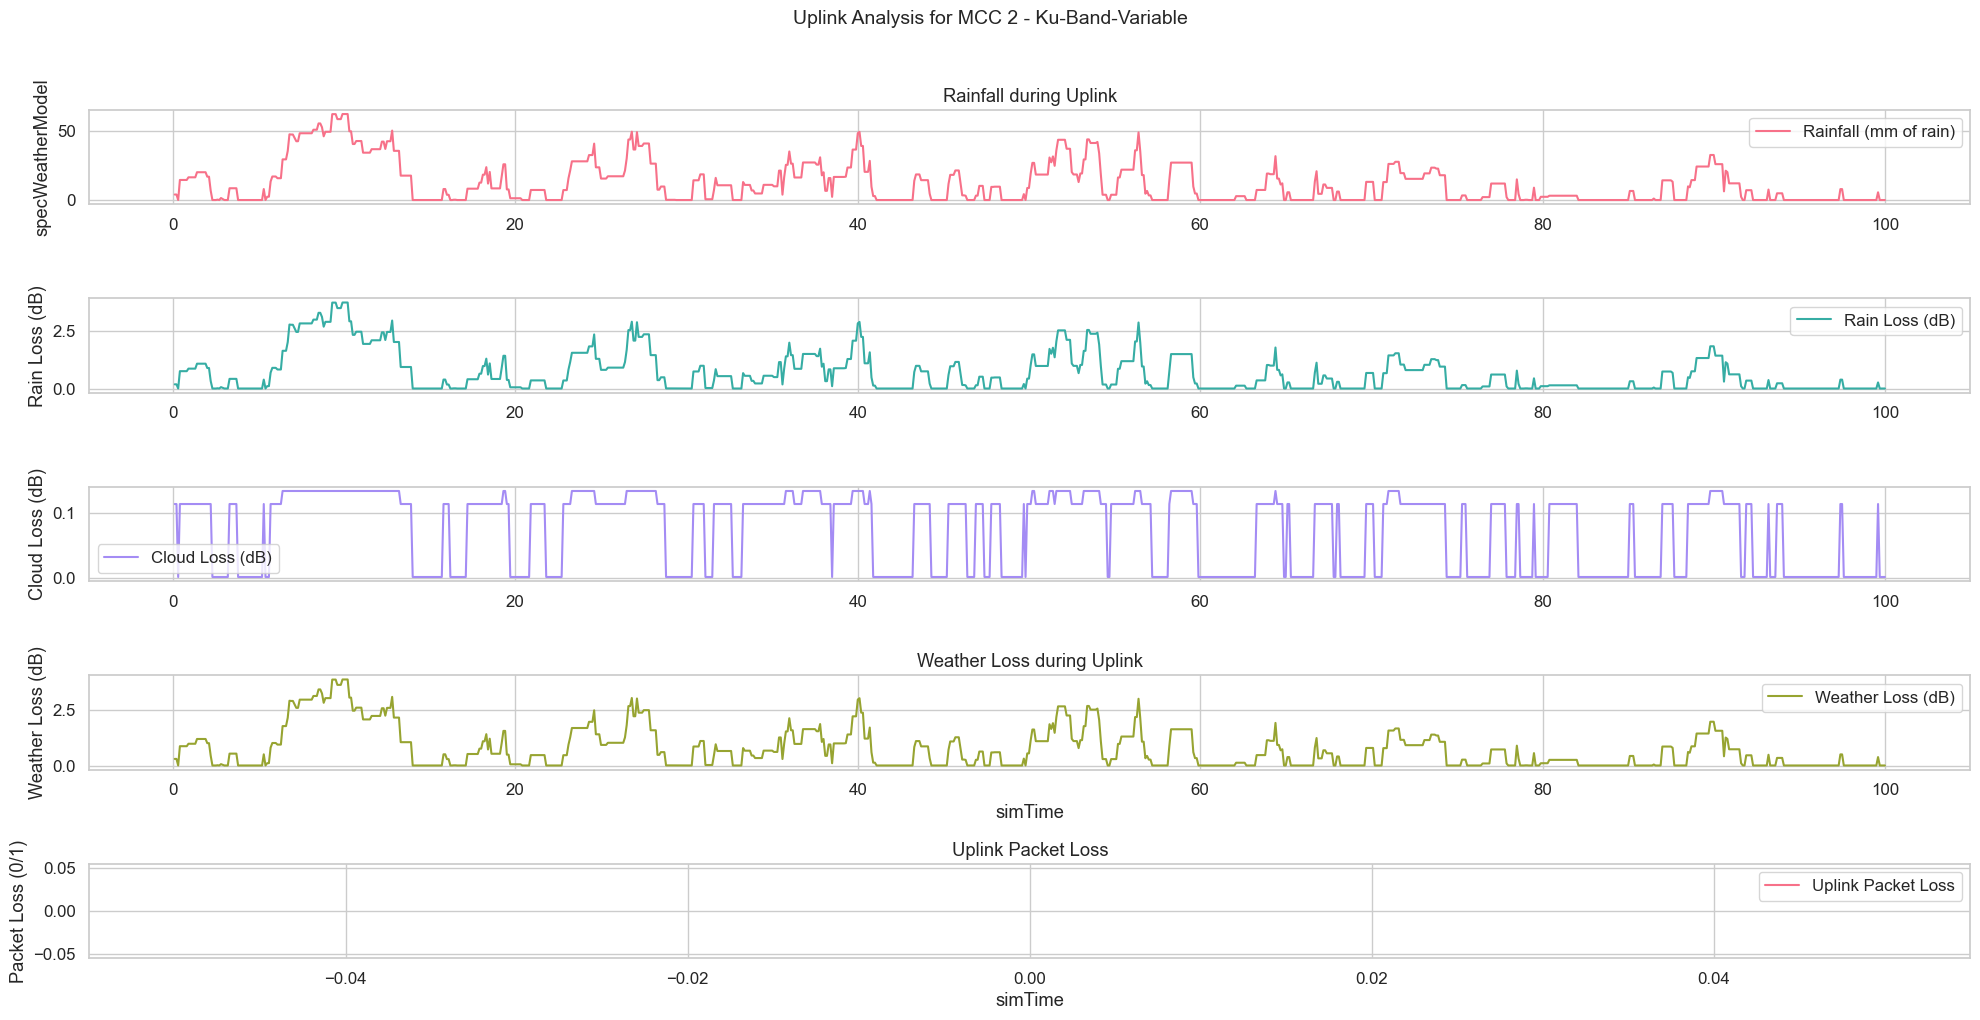

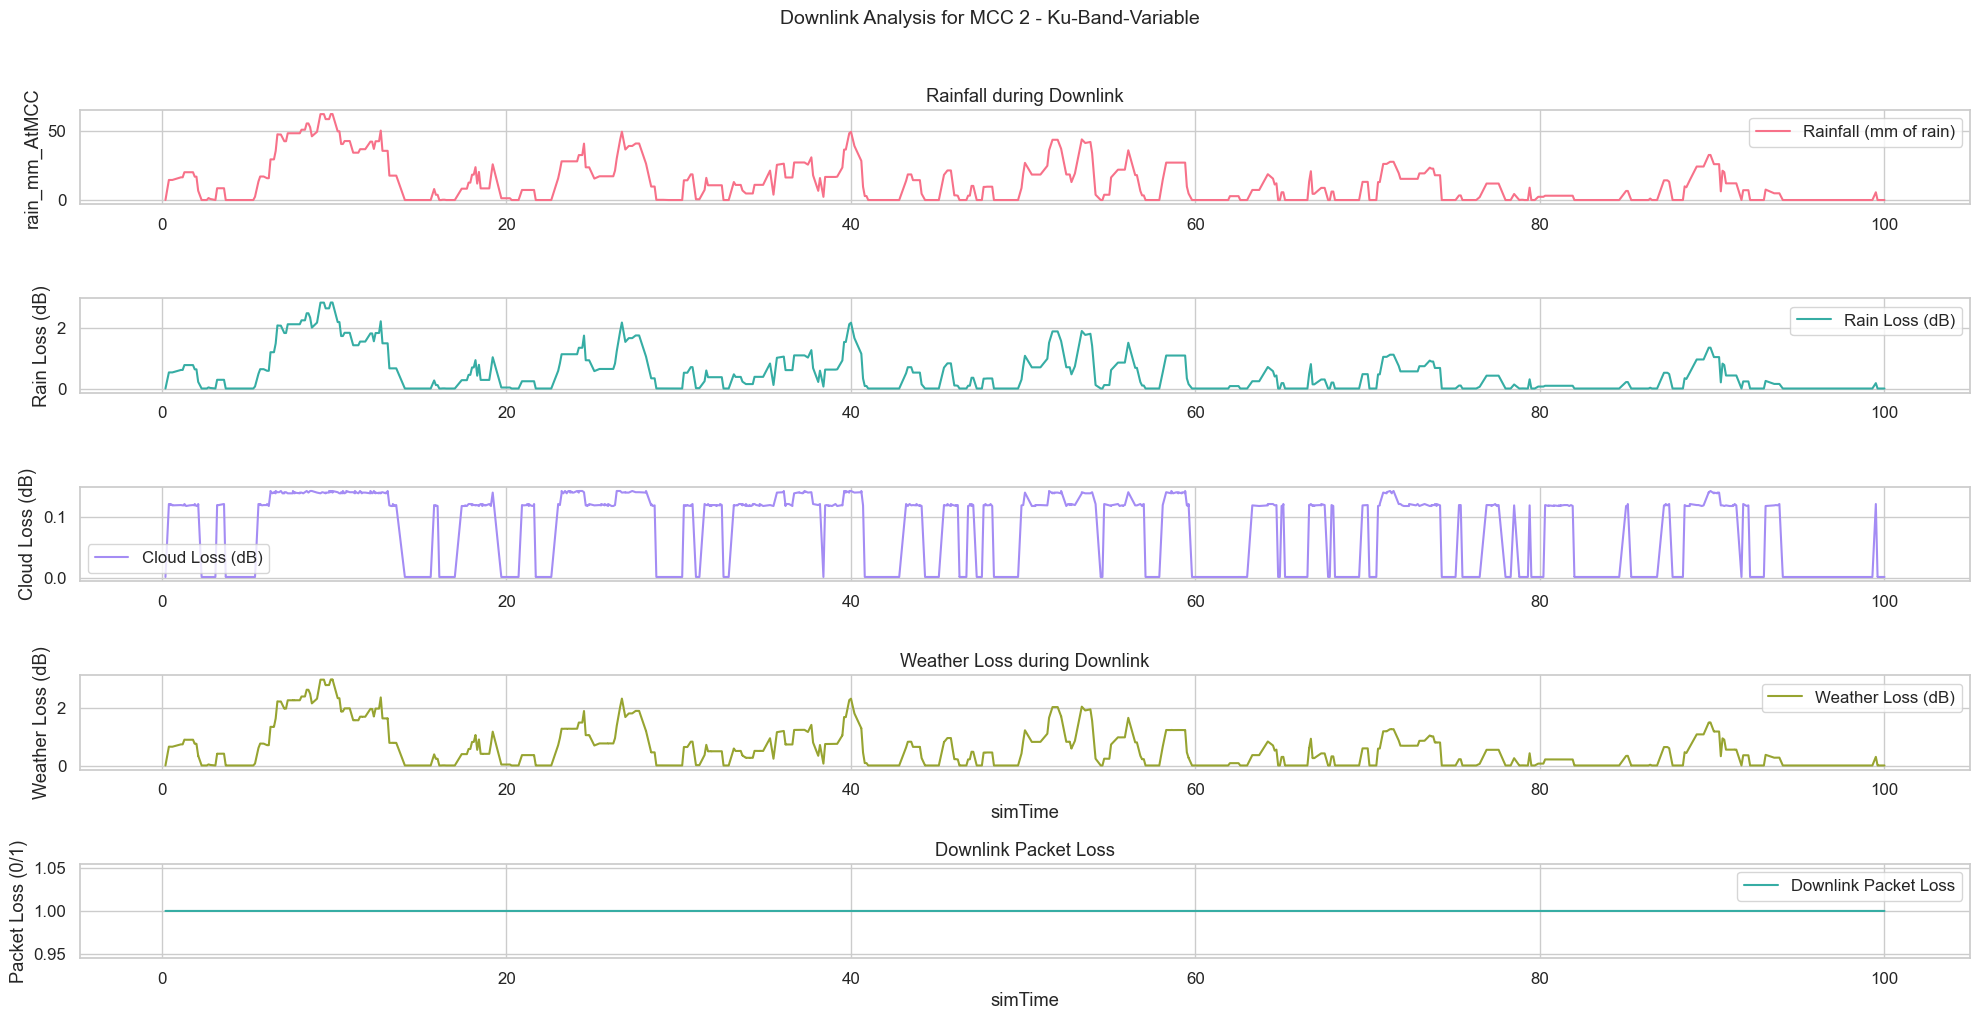

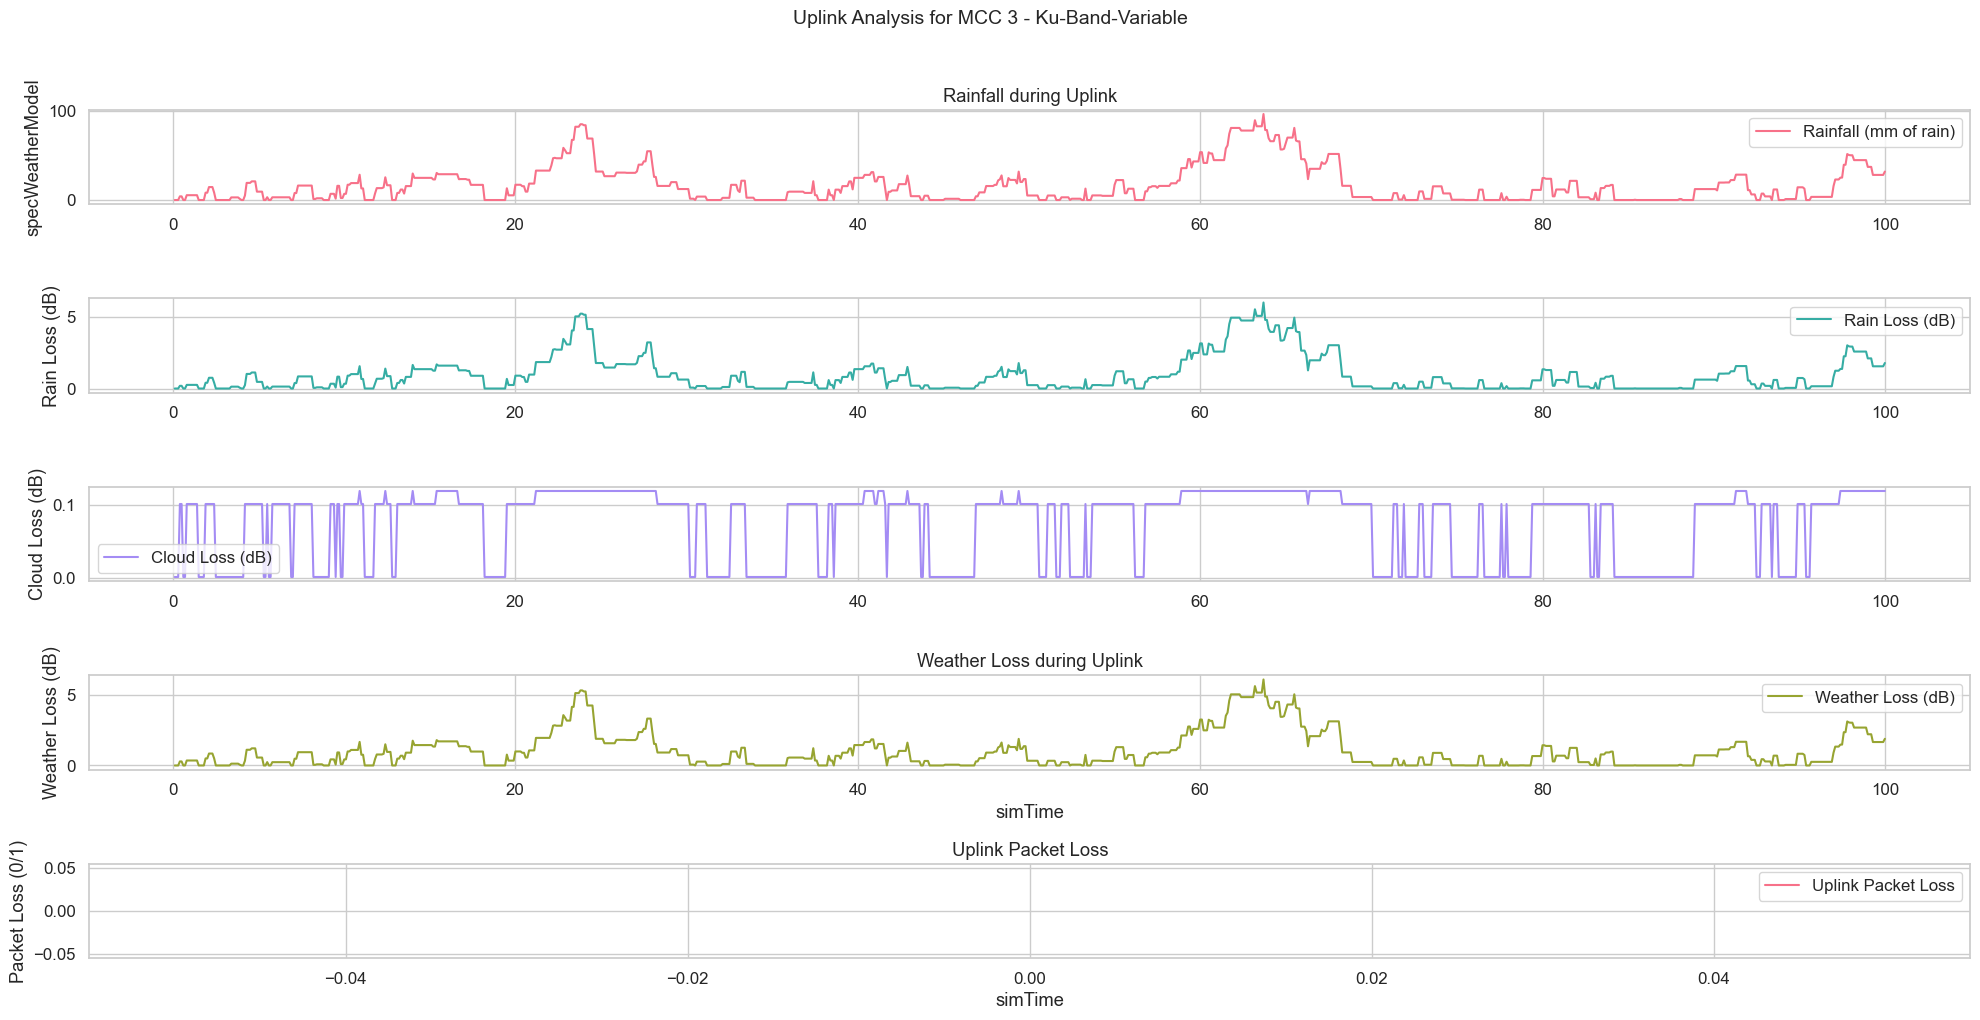

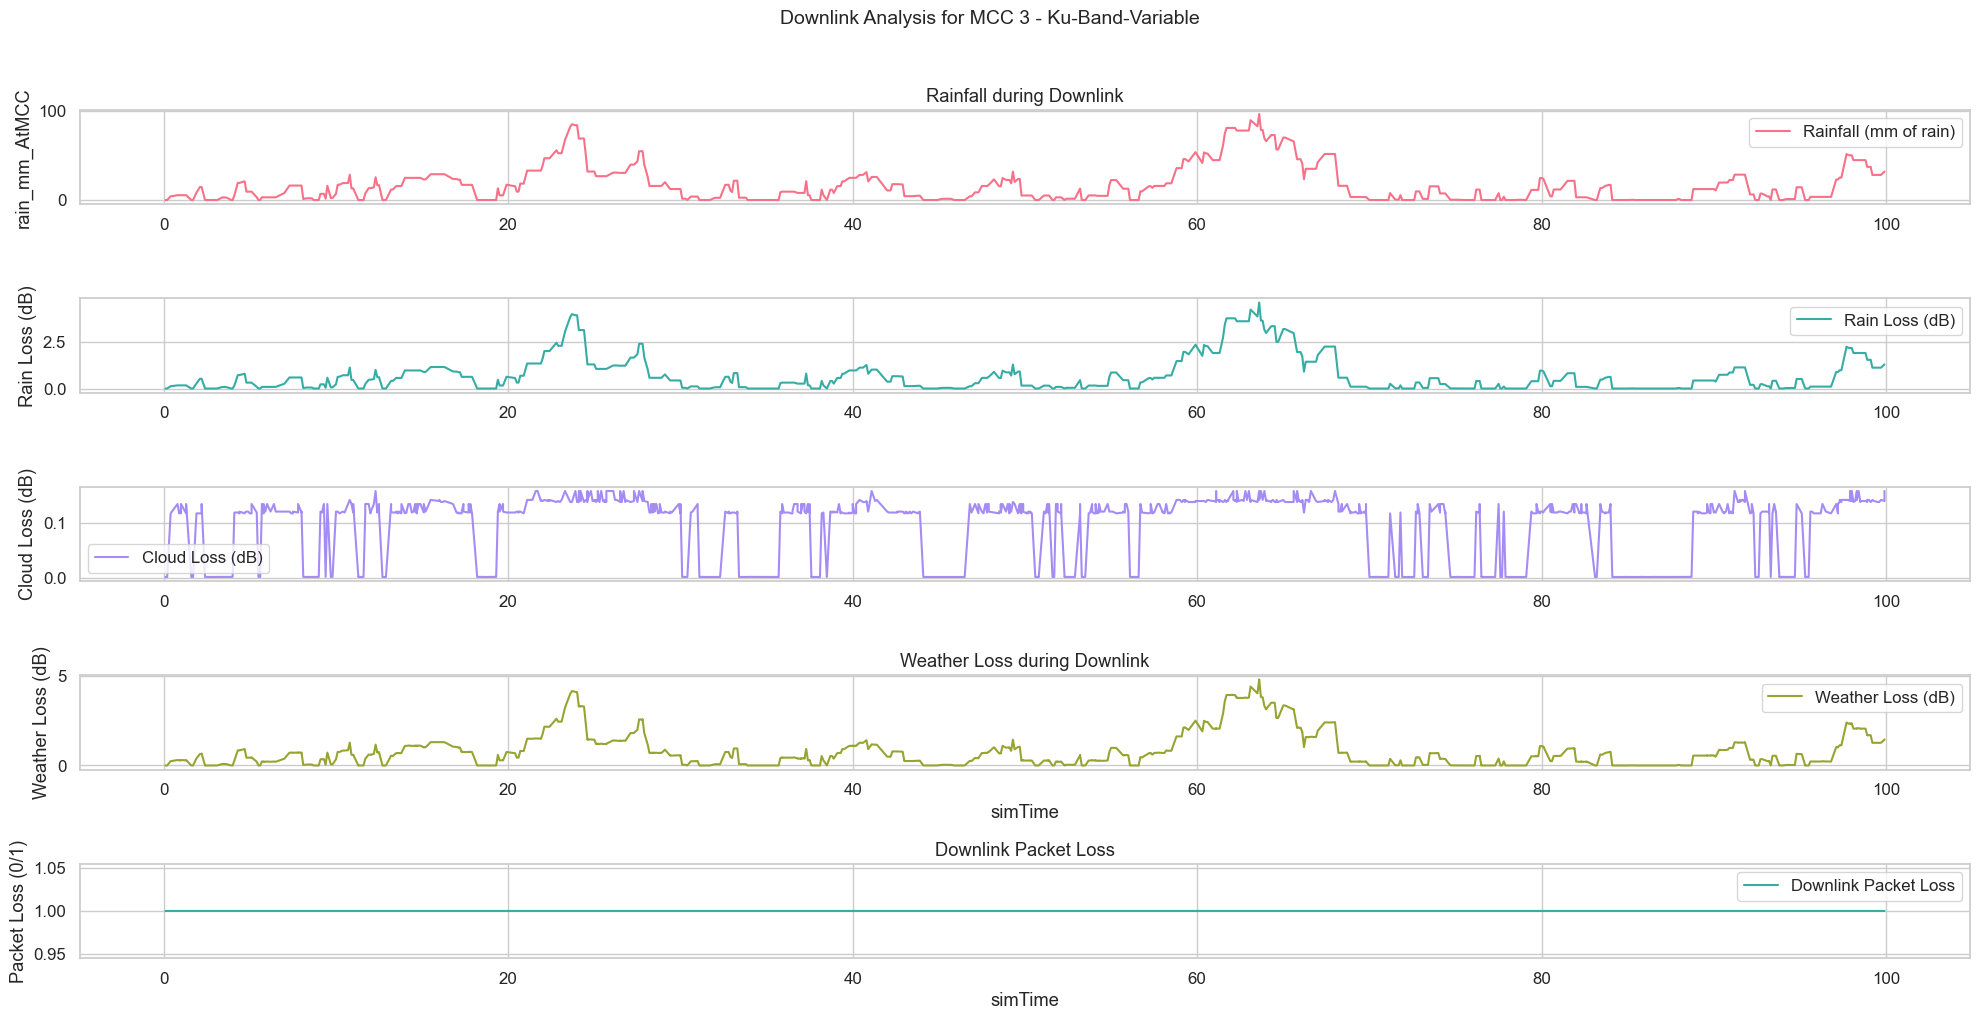

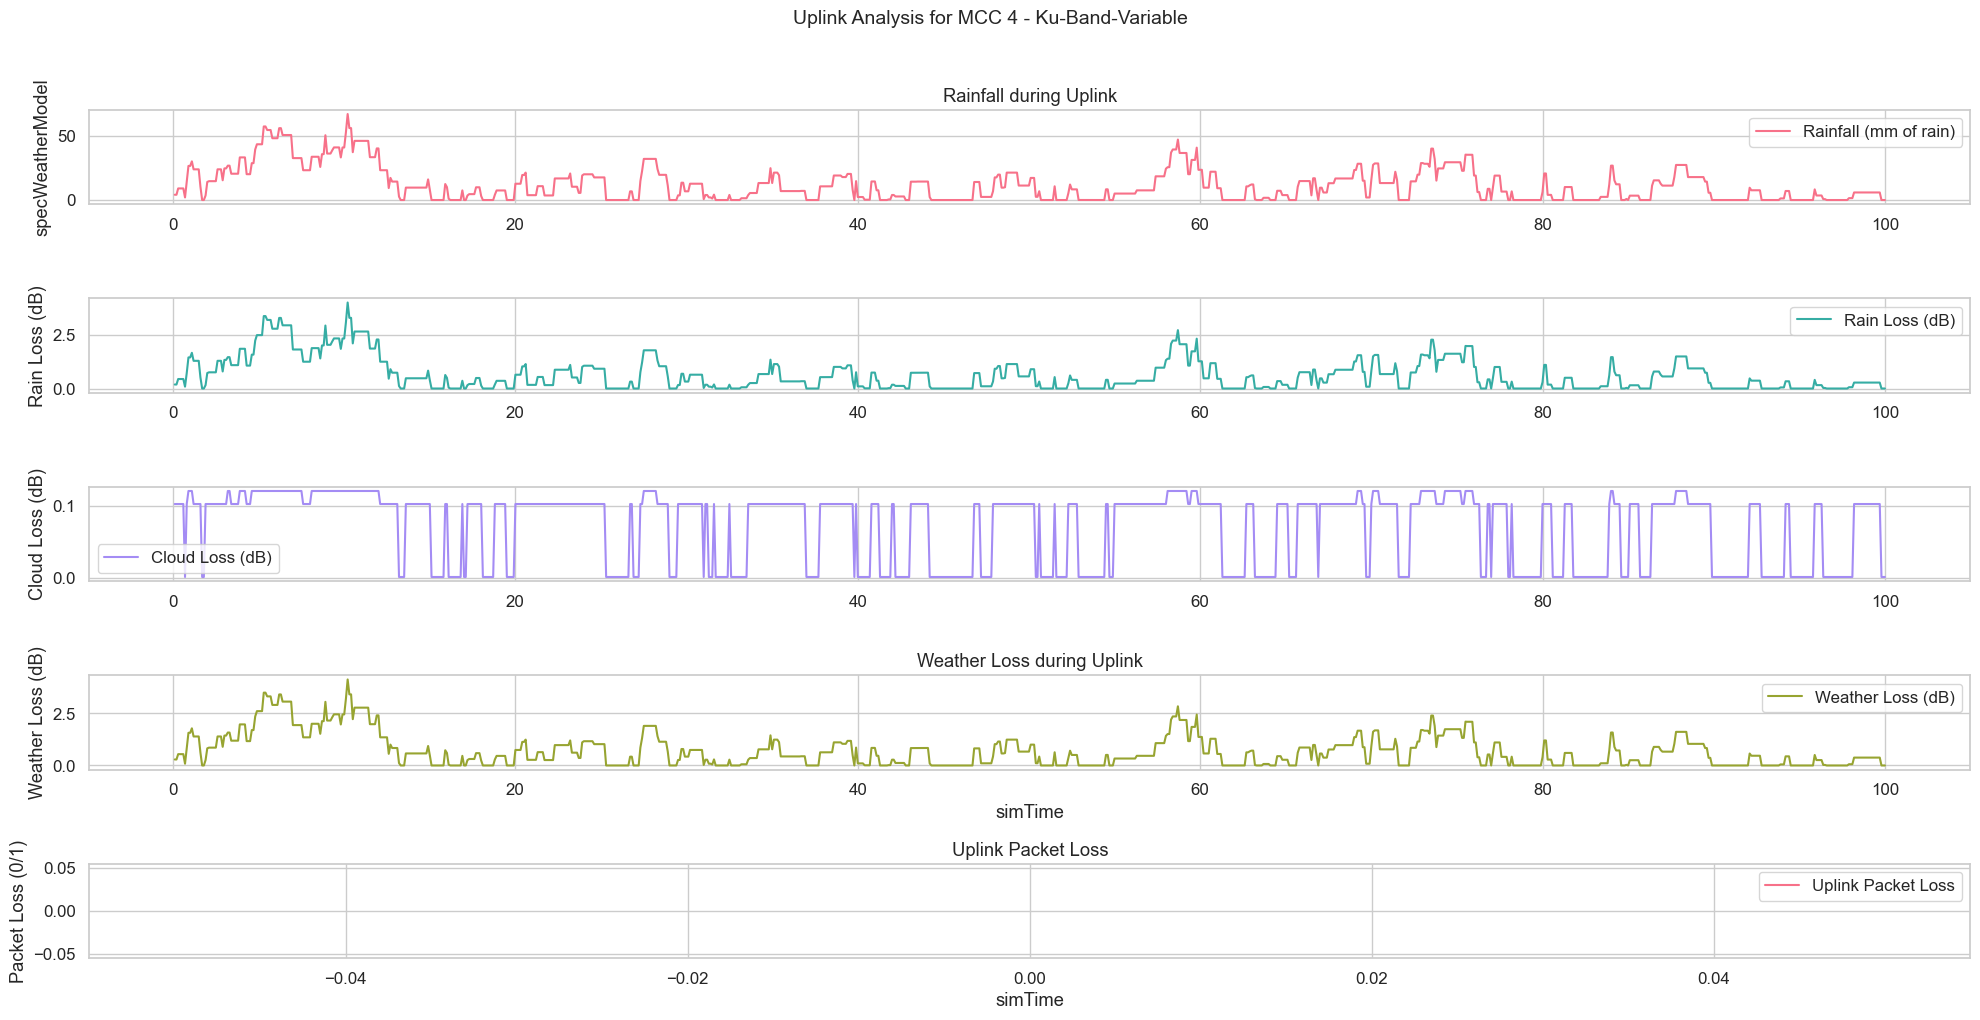

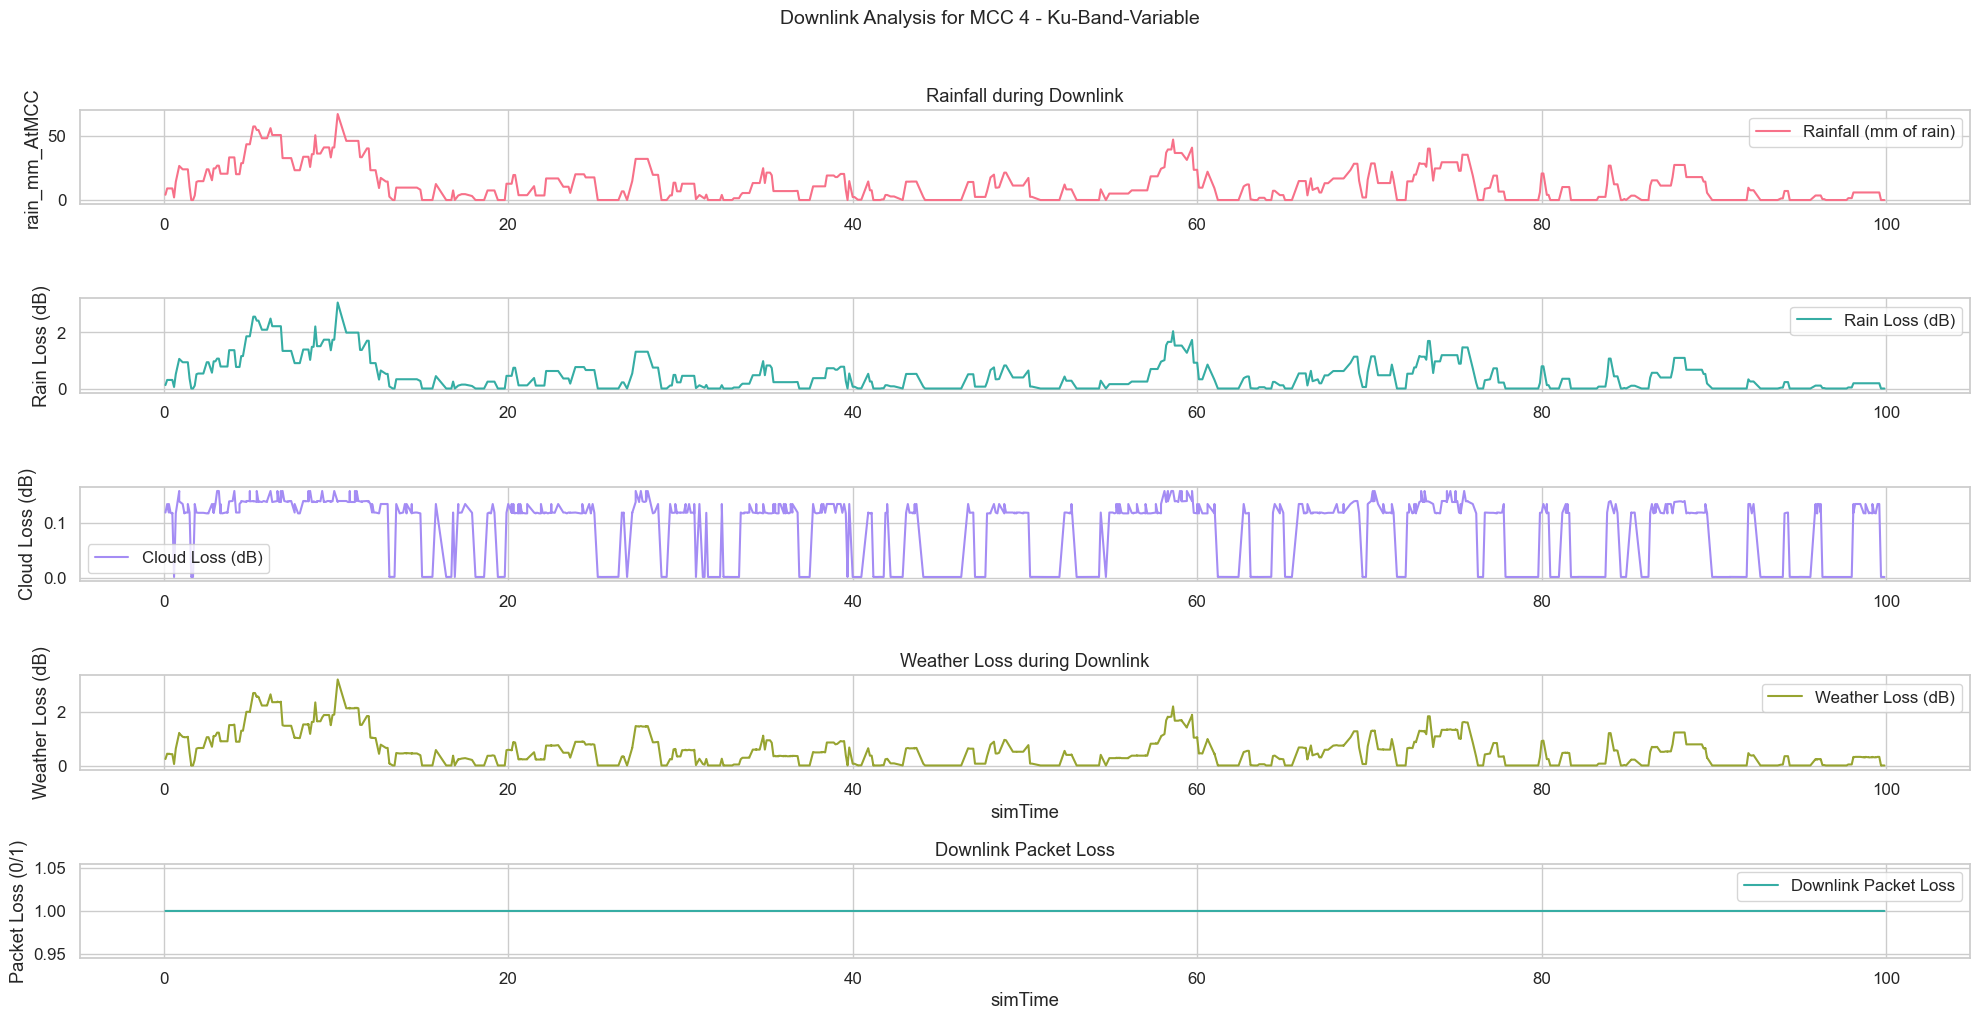

In [48]:
read_and_plot_files("Ku-Band-Variable")

## Ka-Band

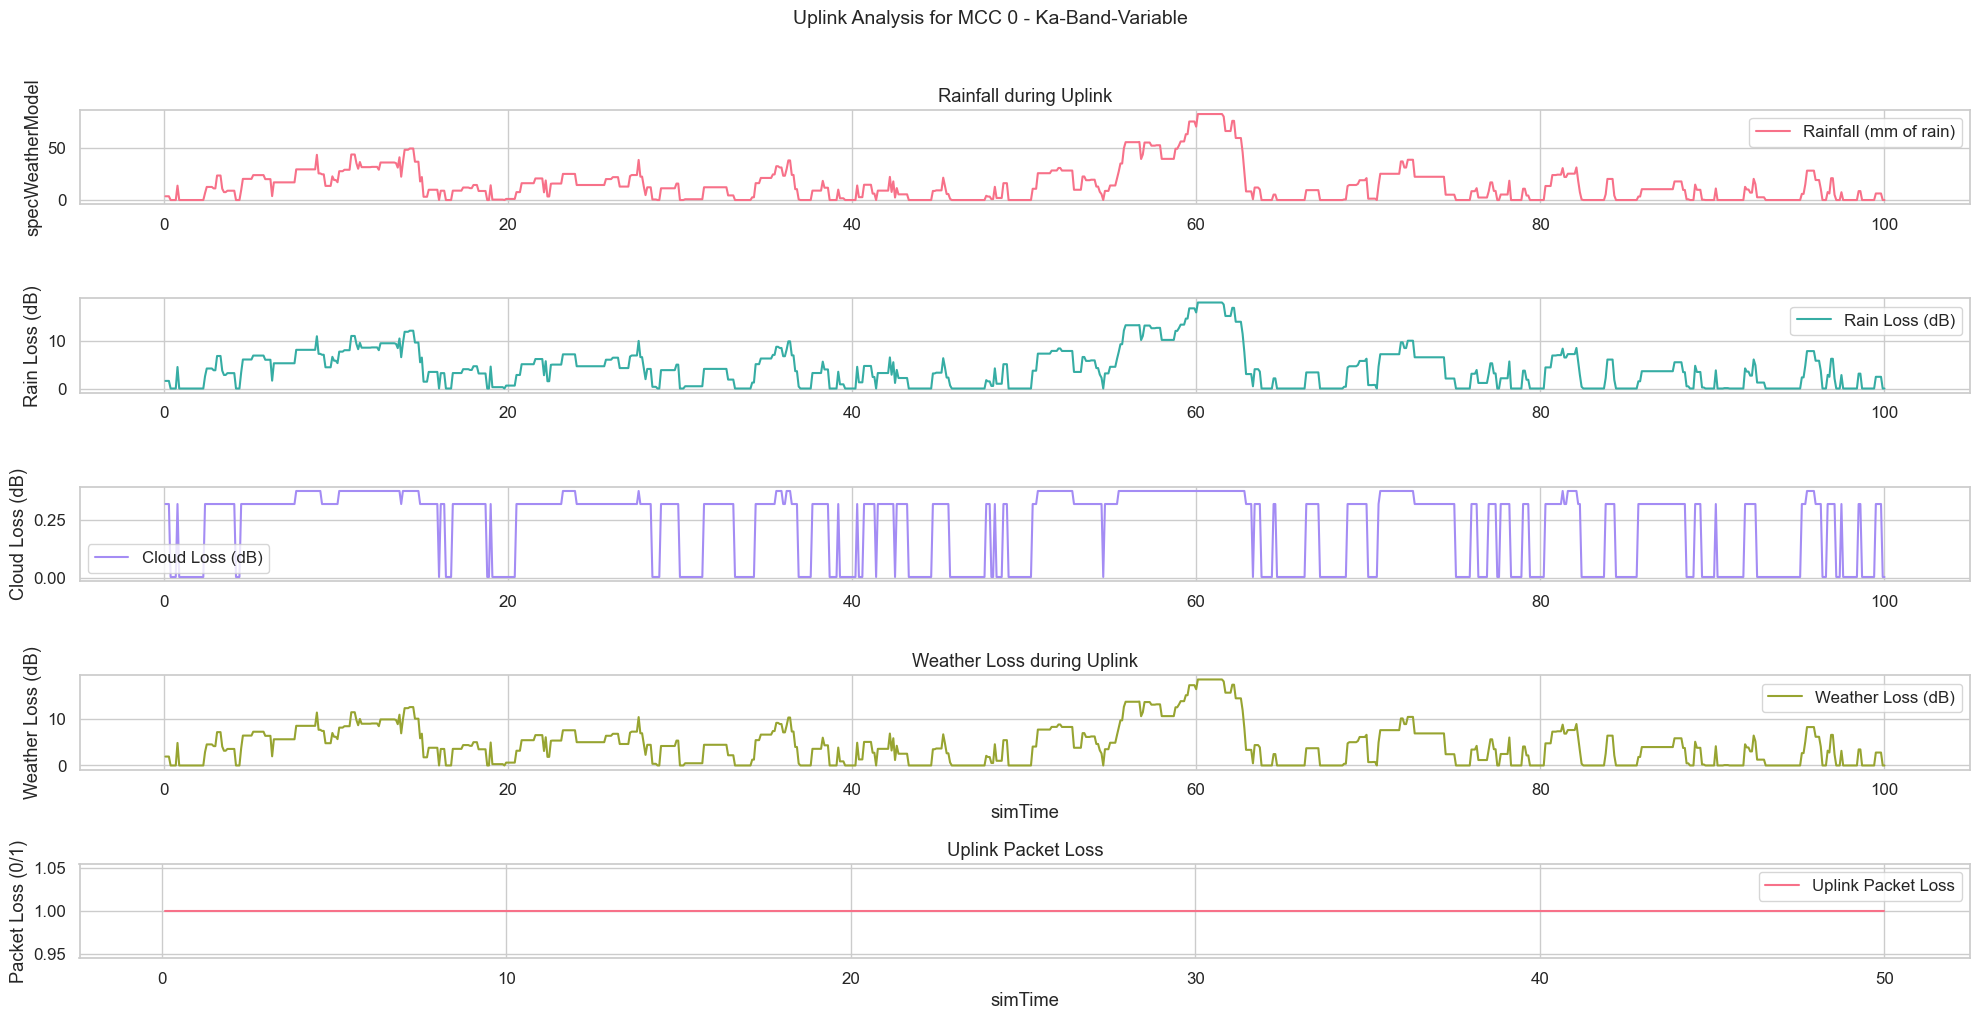

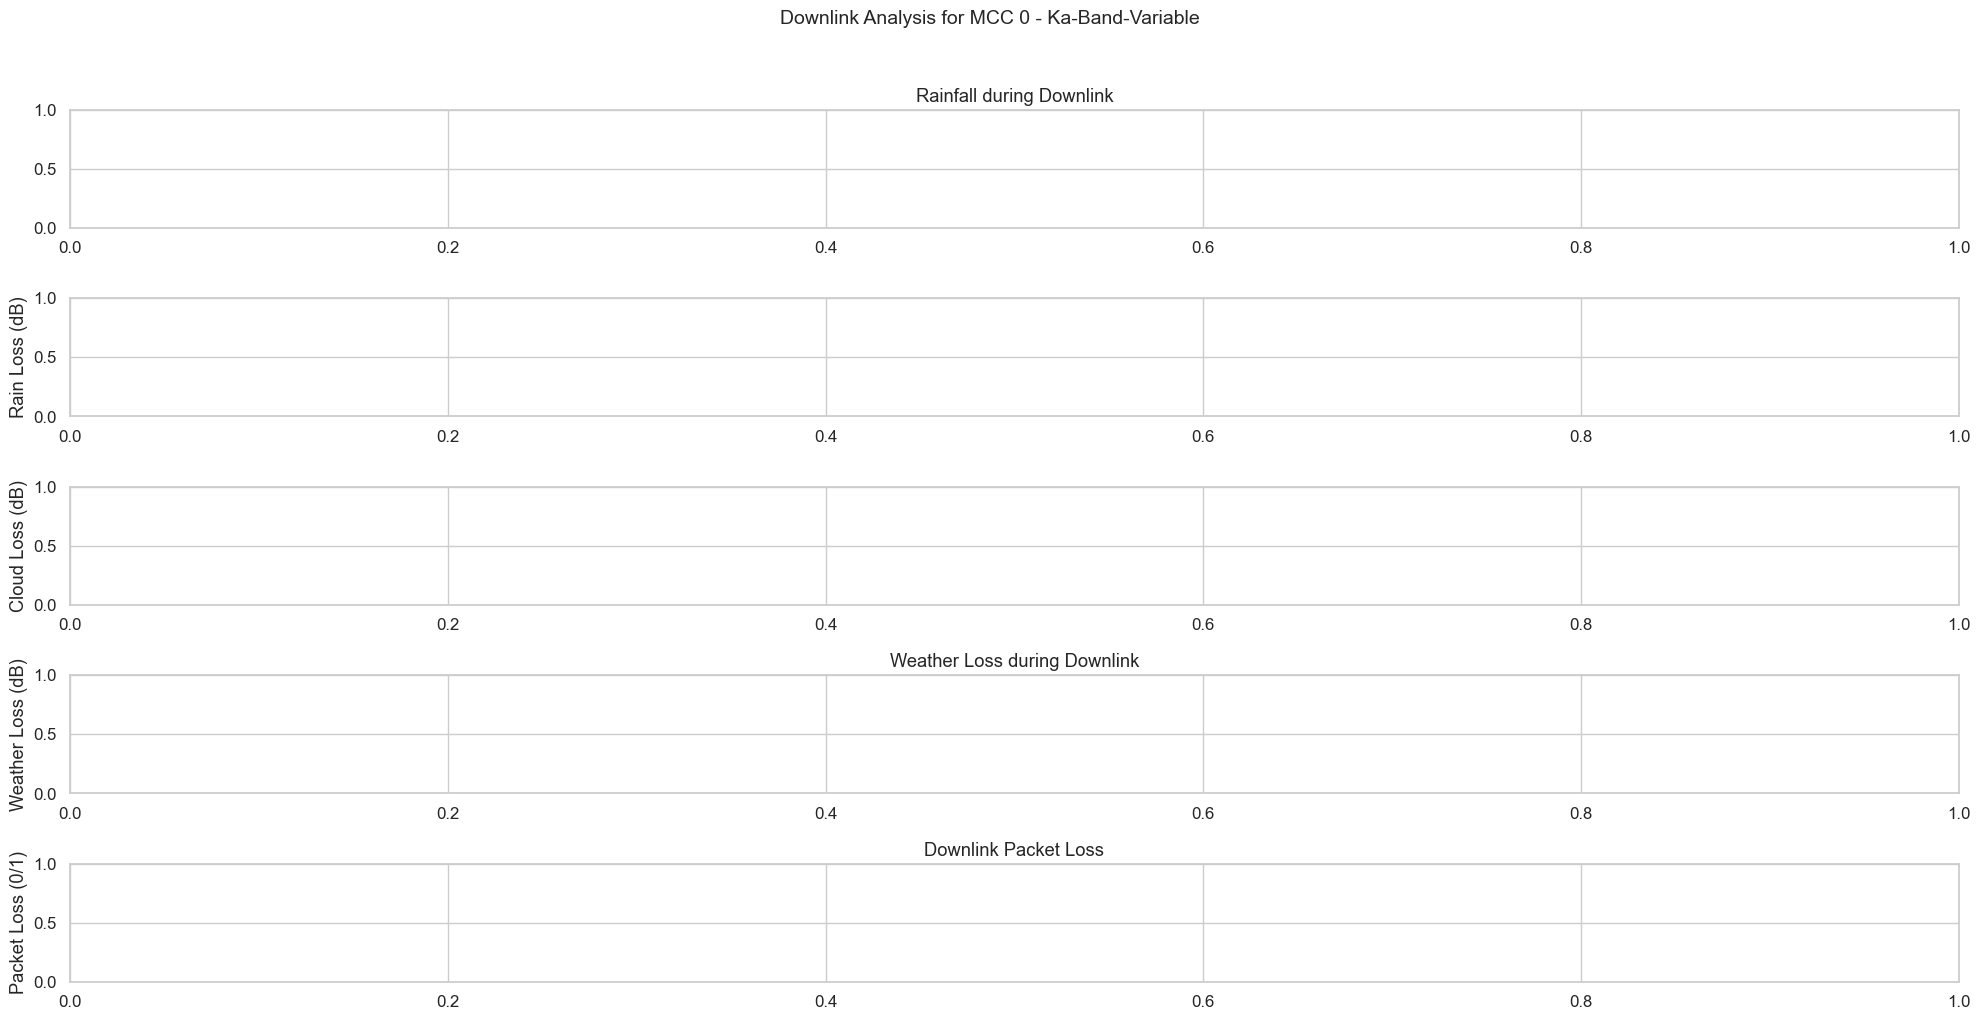

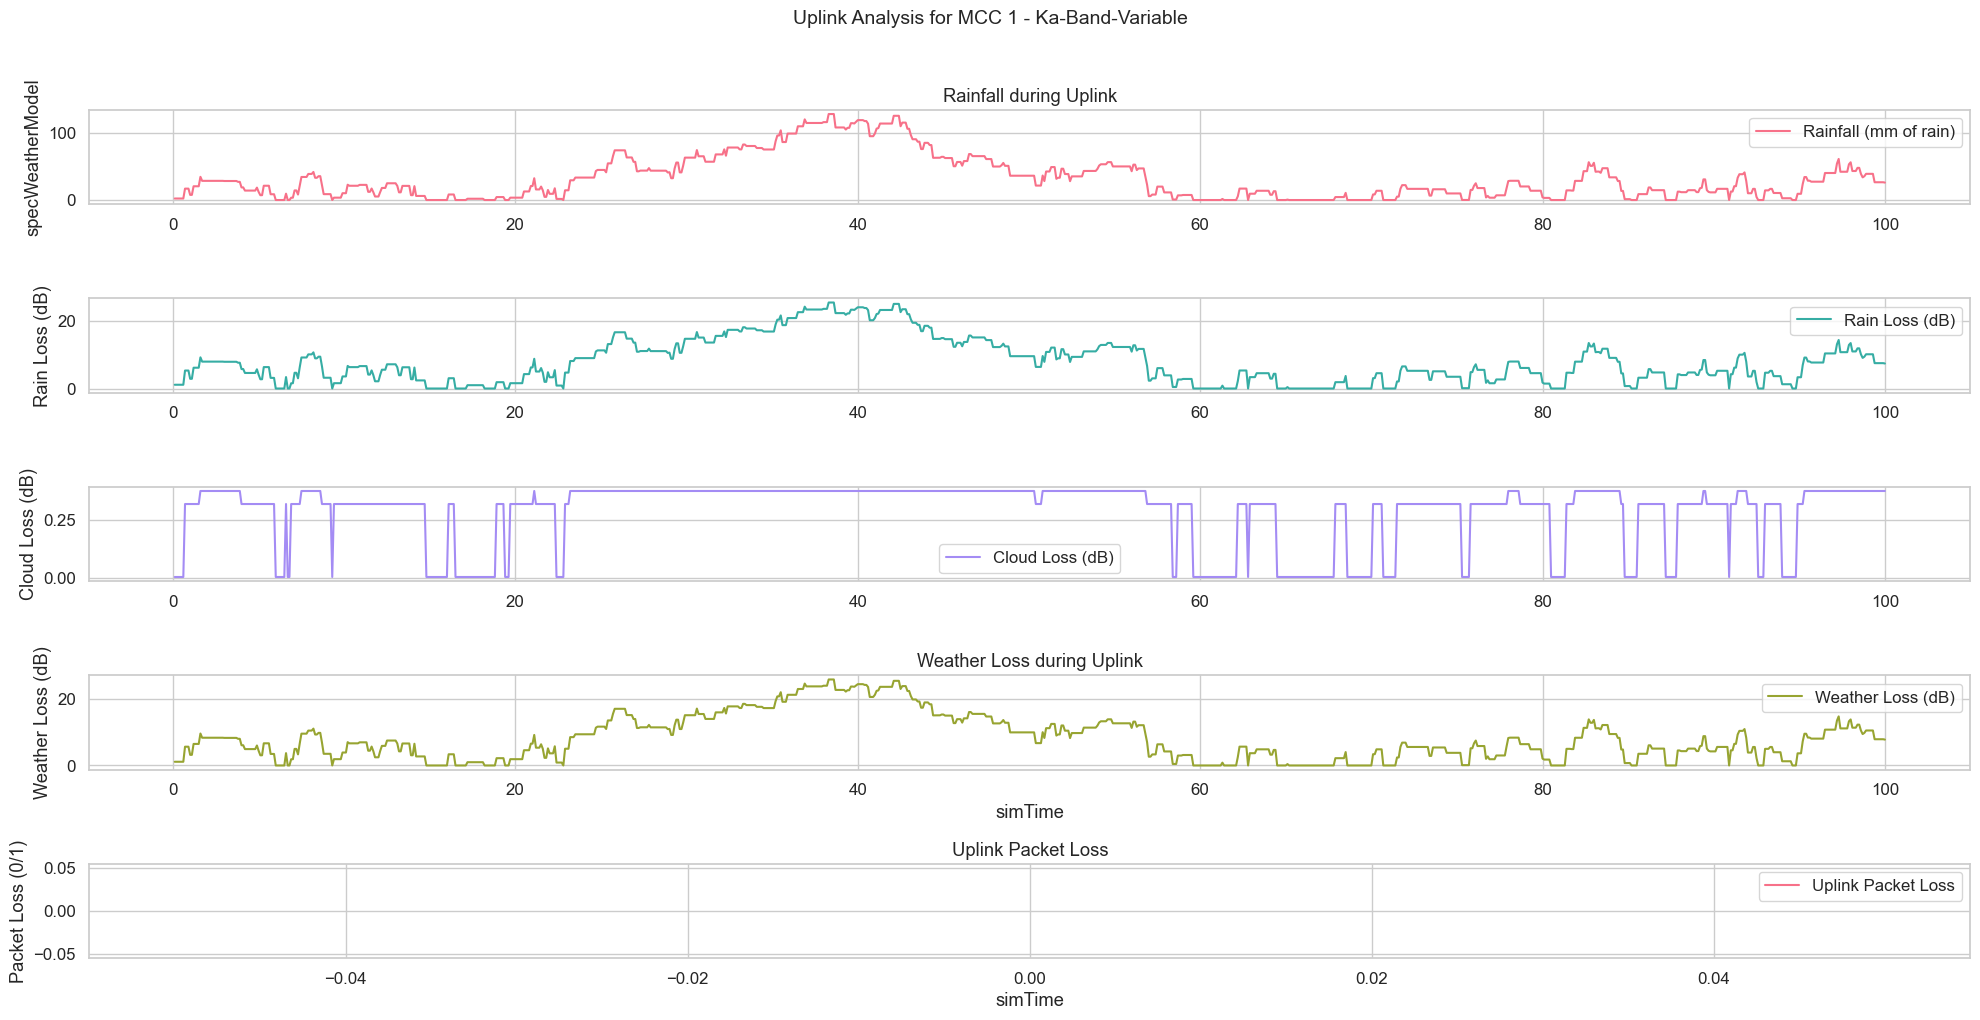

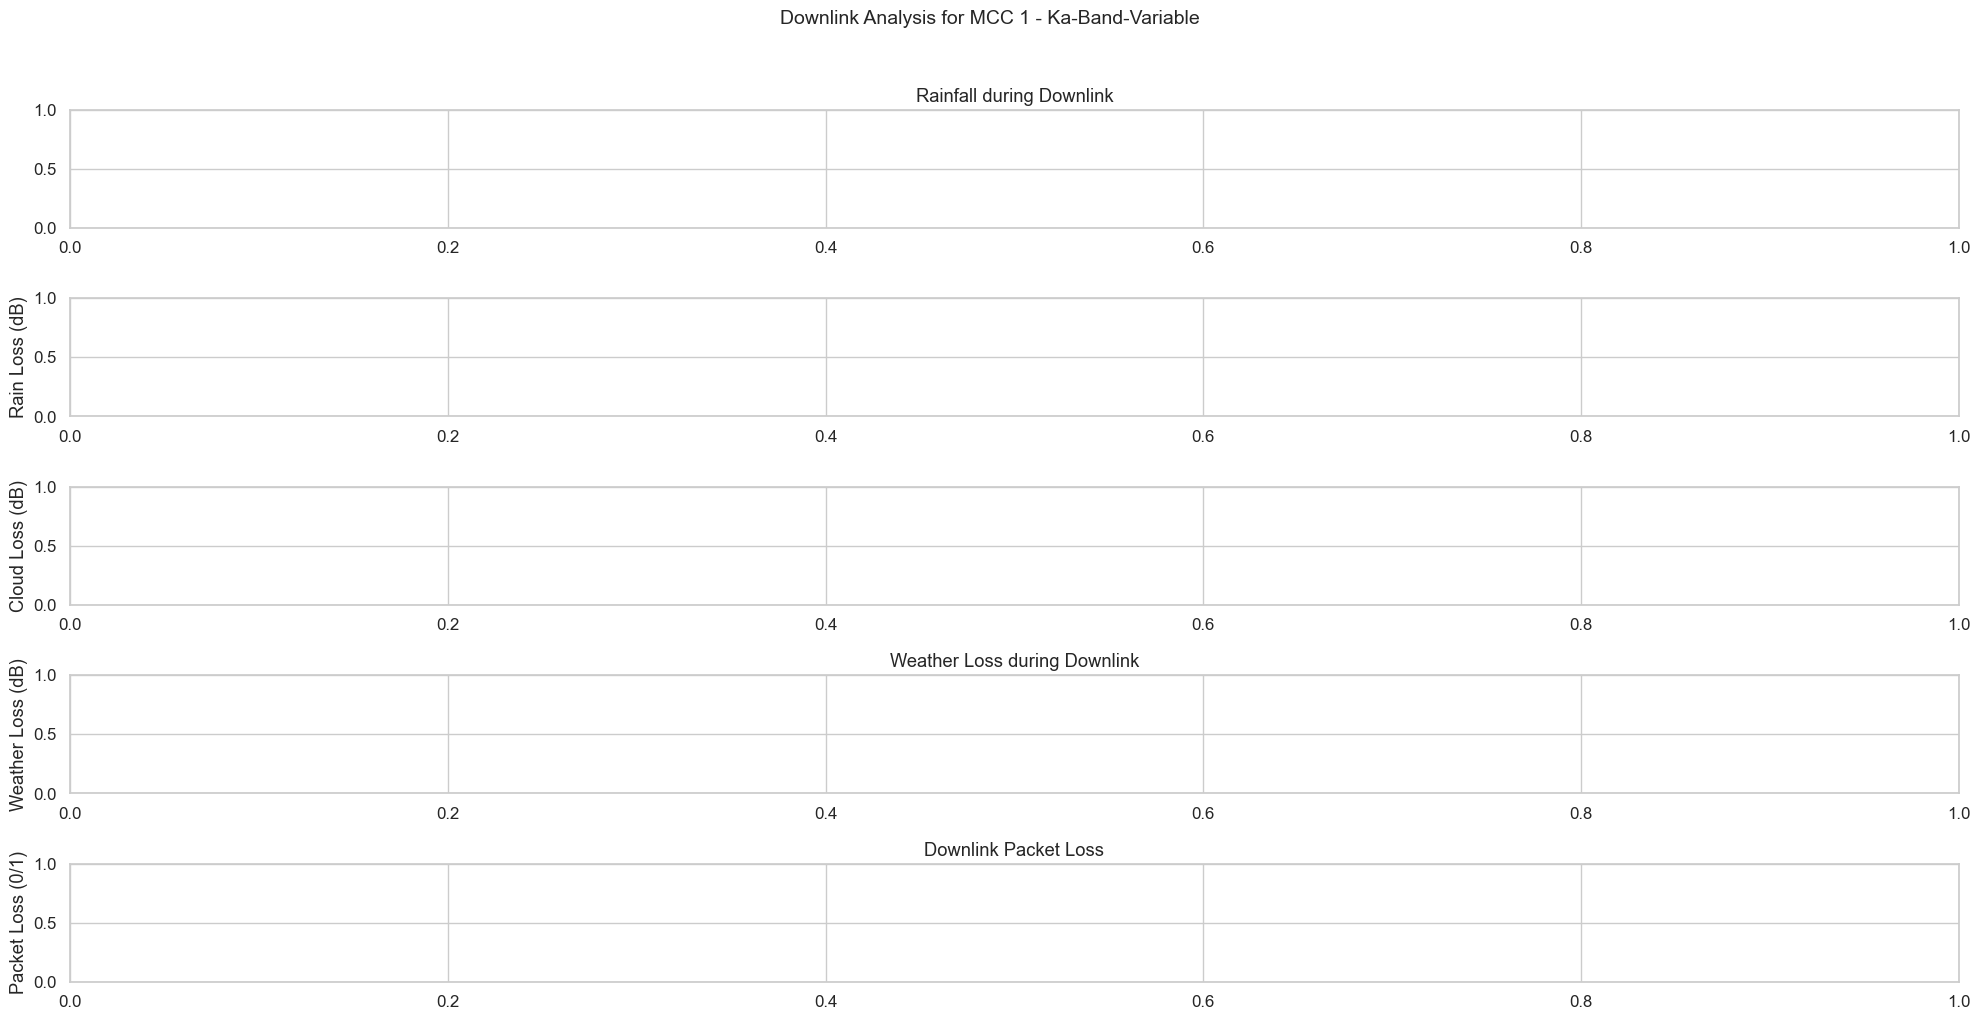

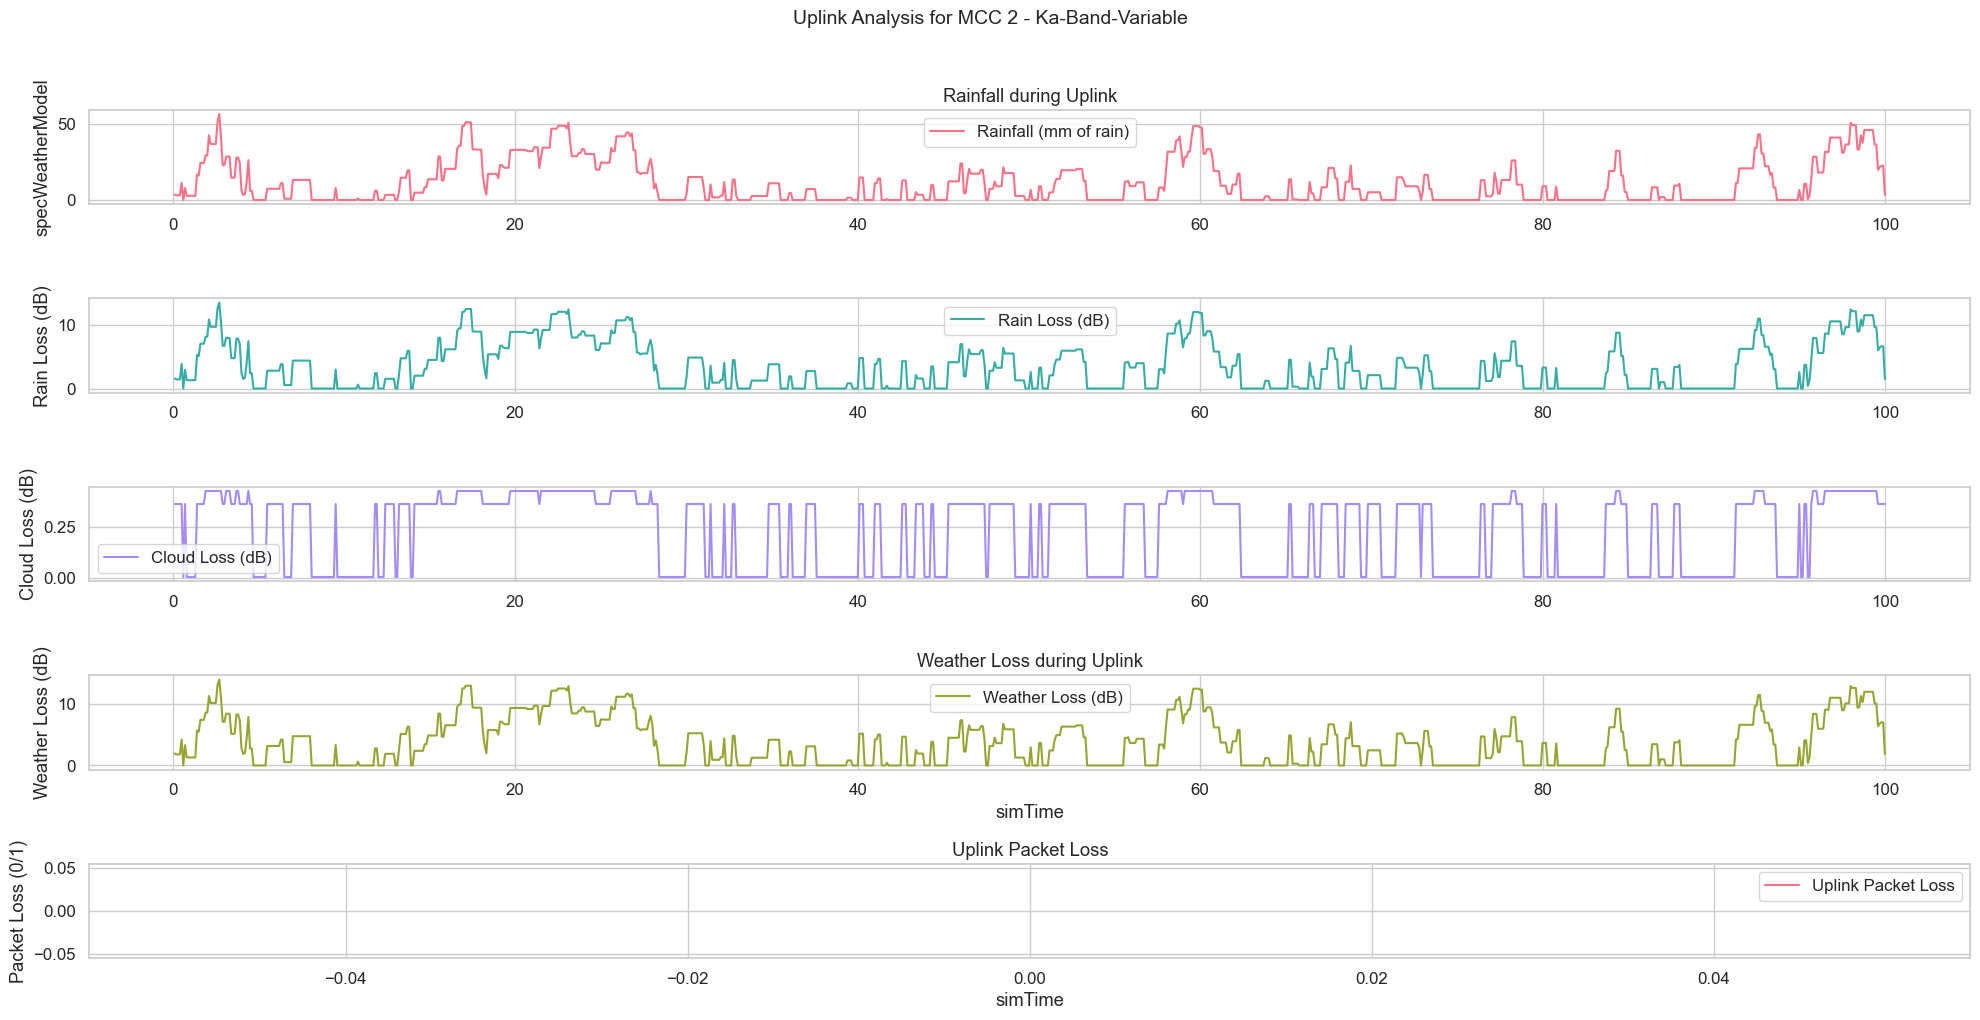

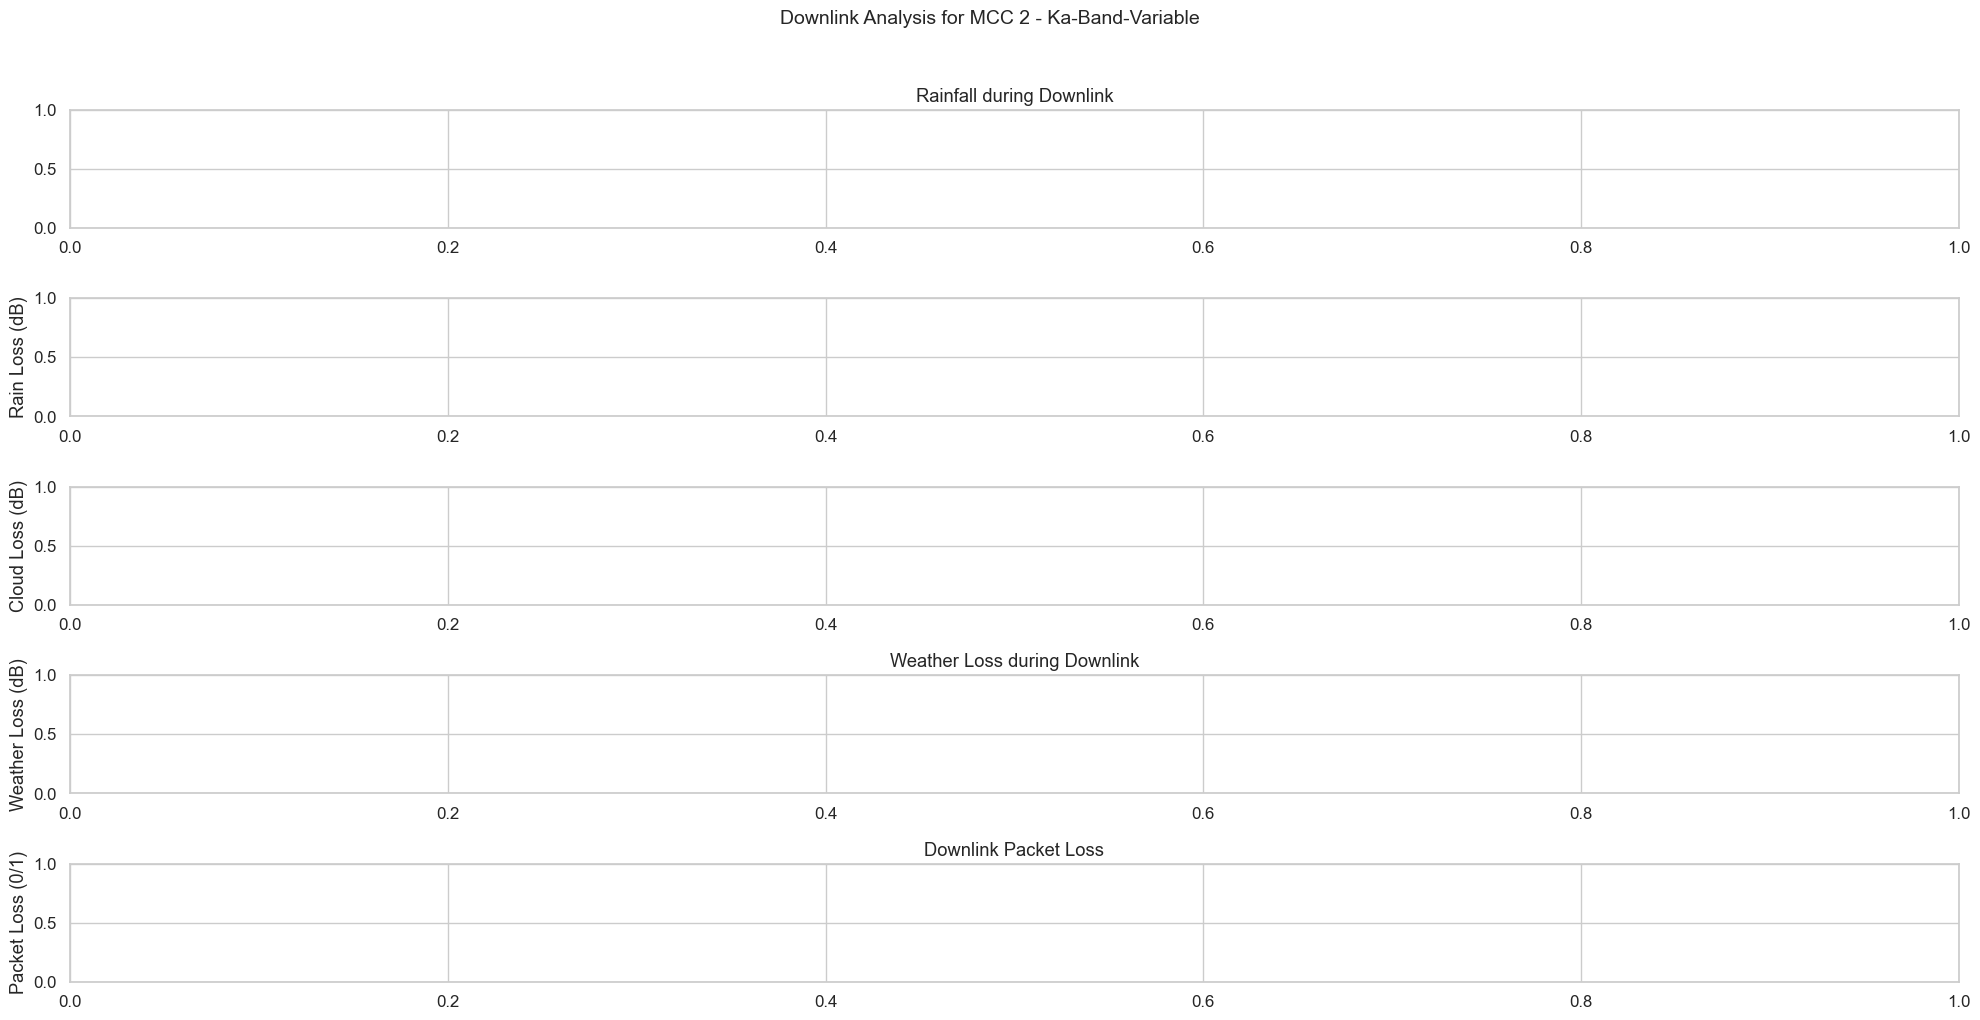

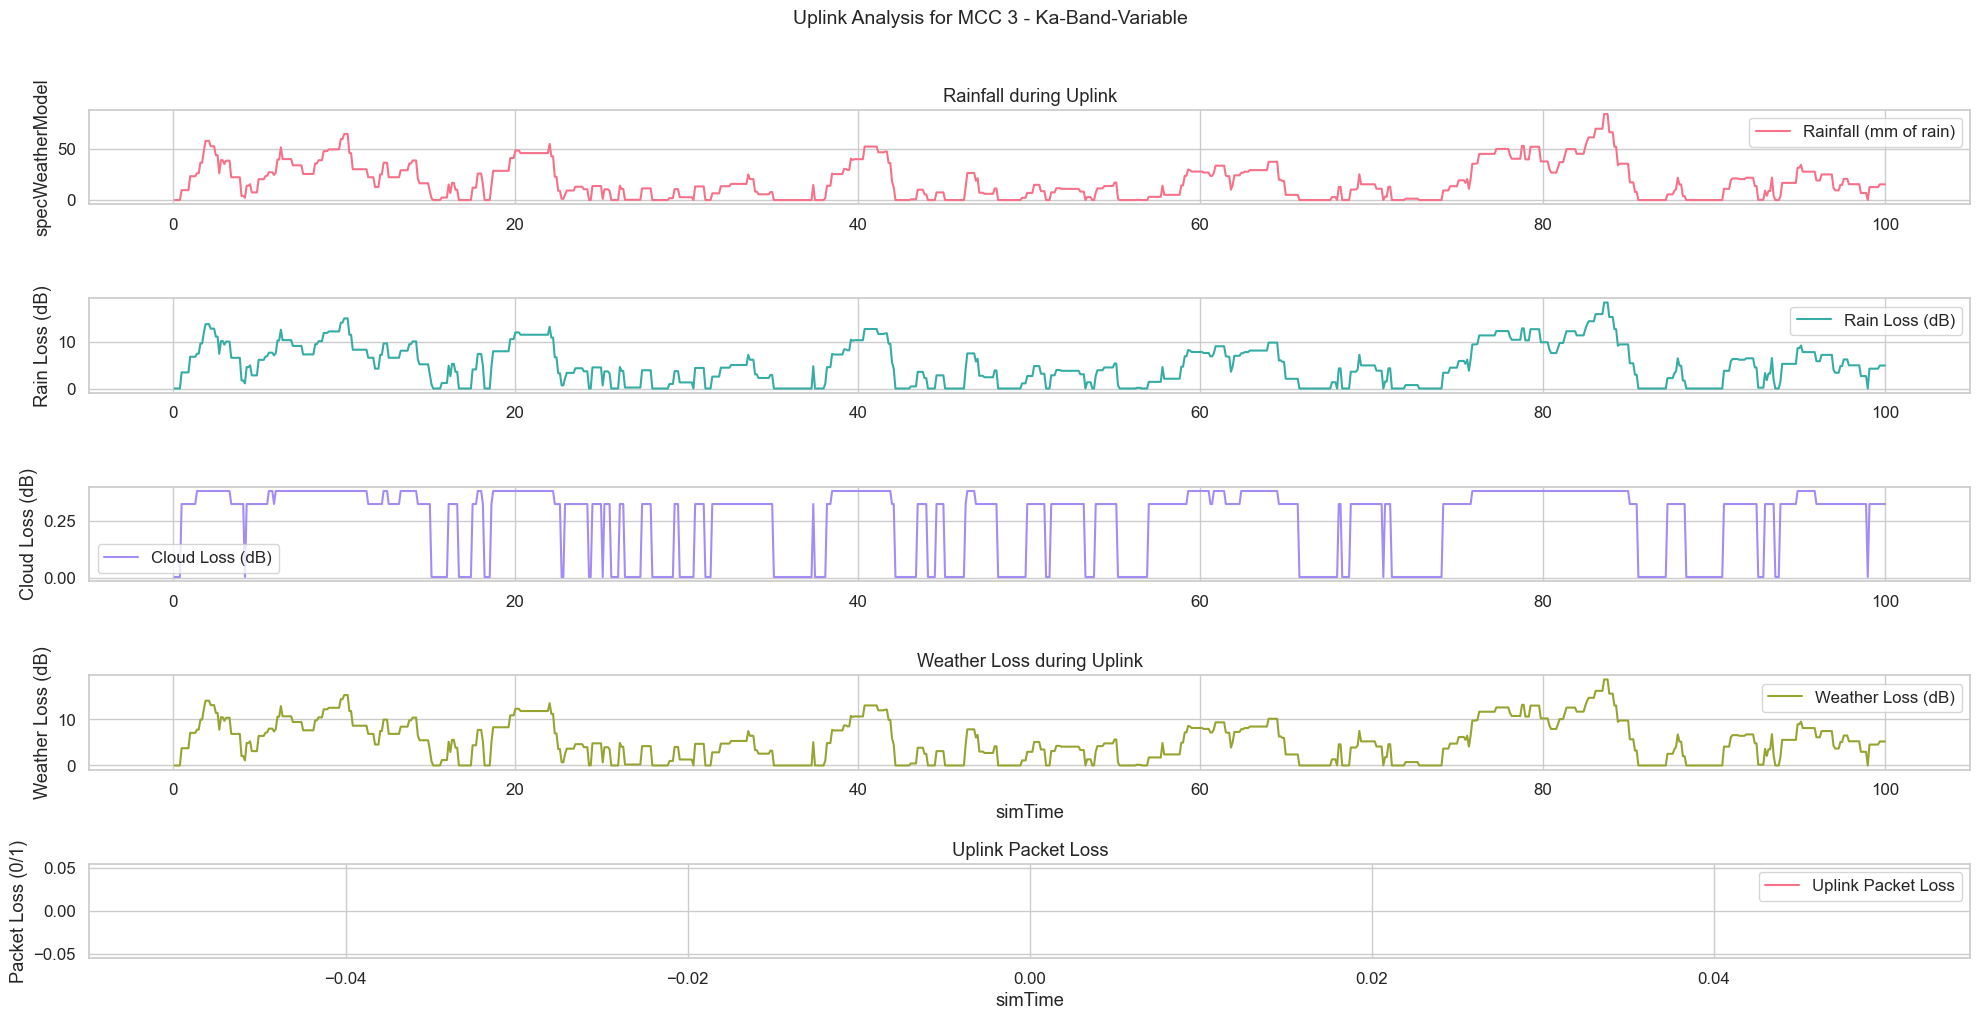

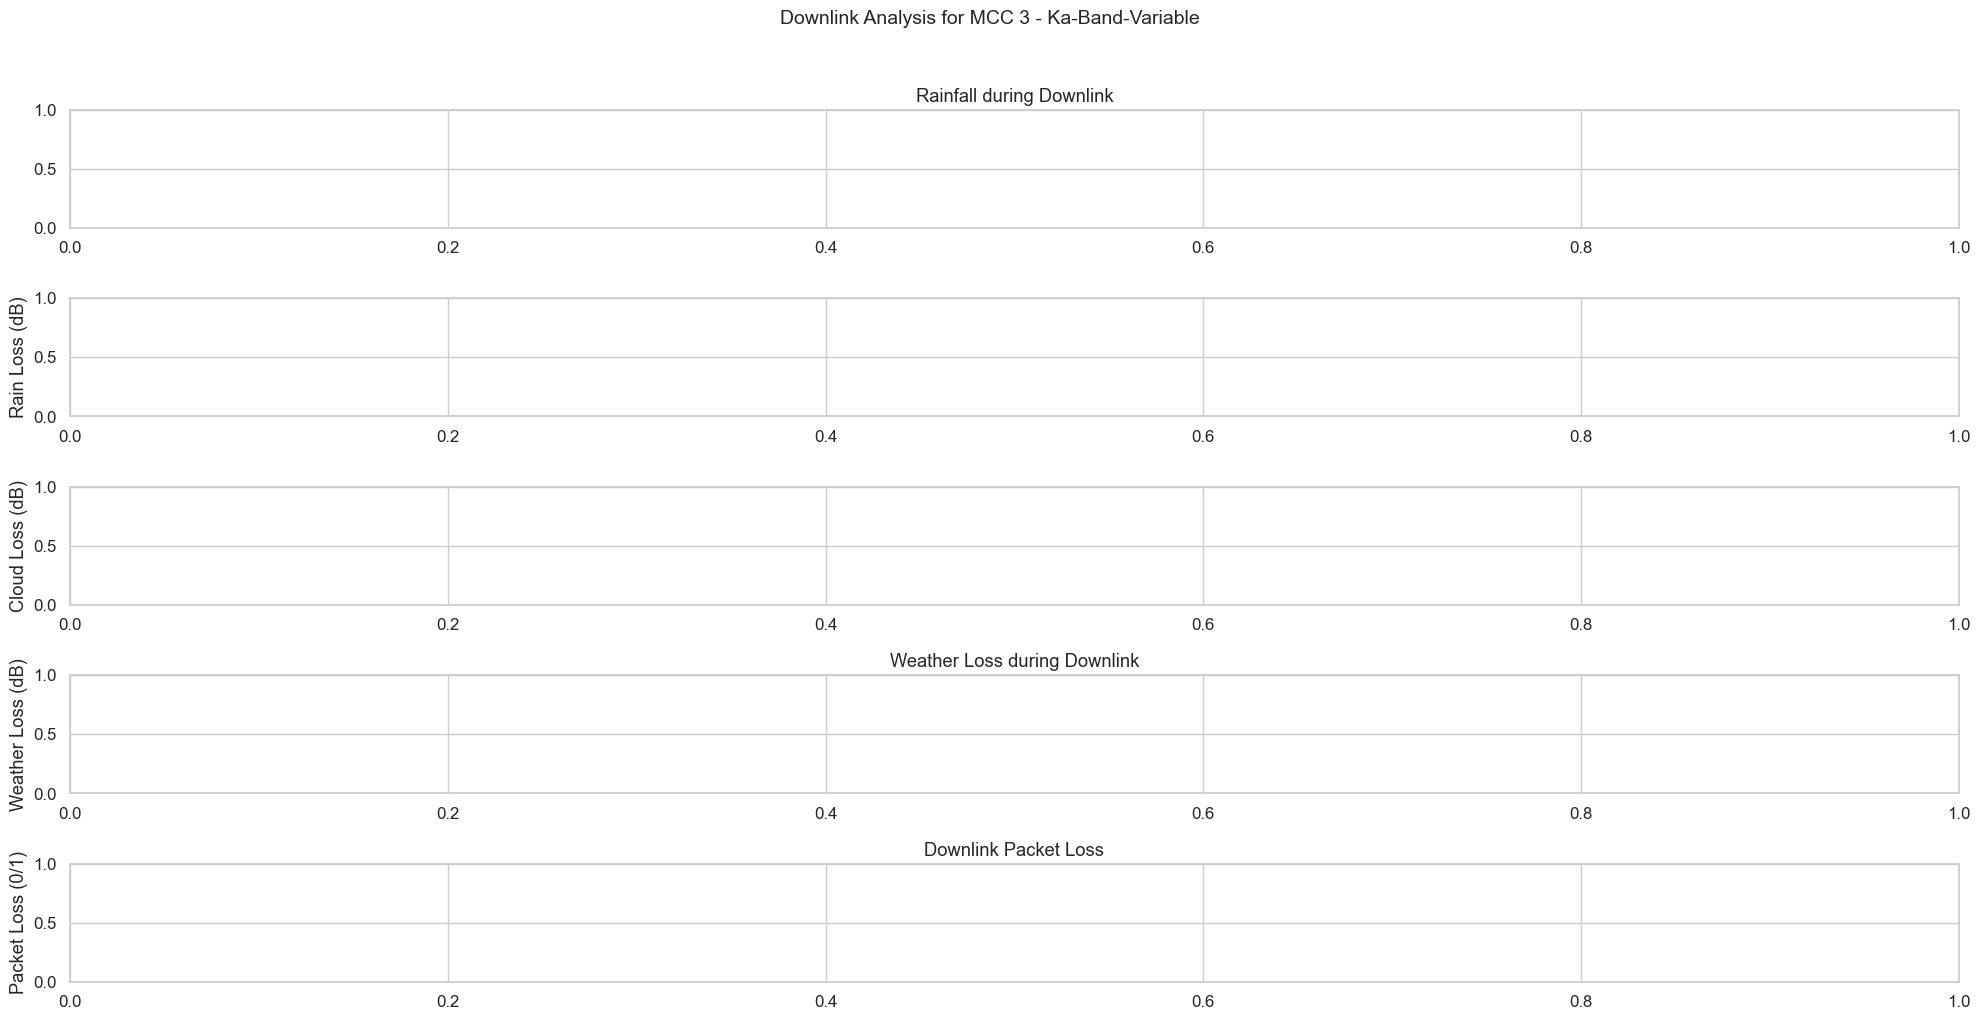

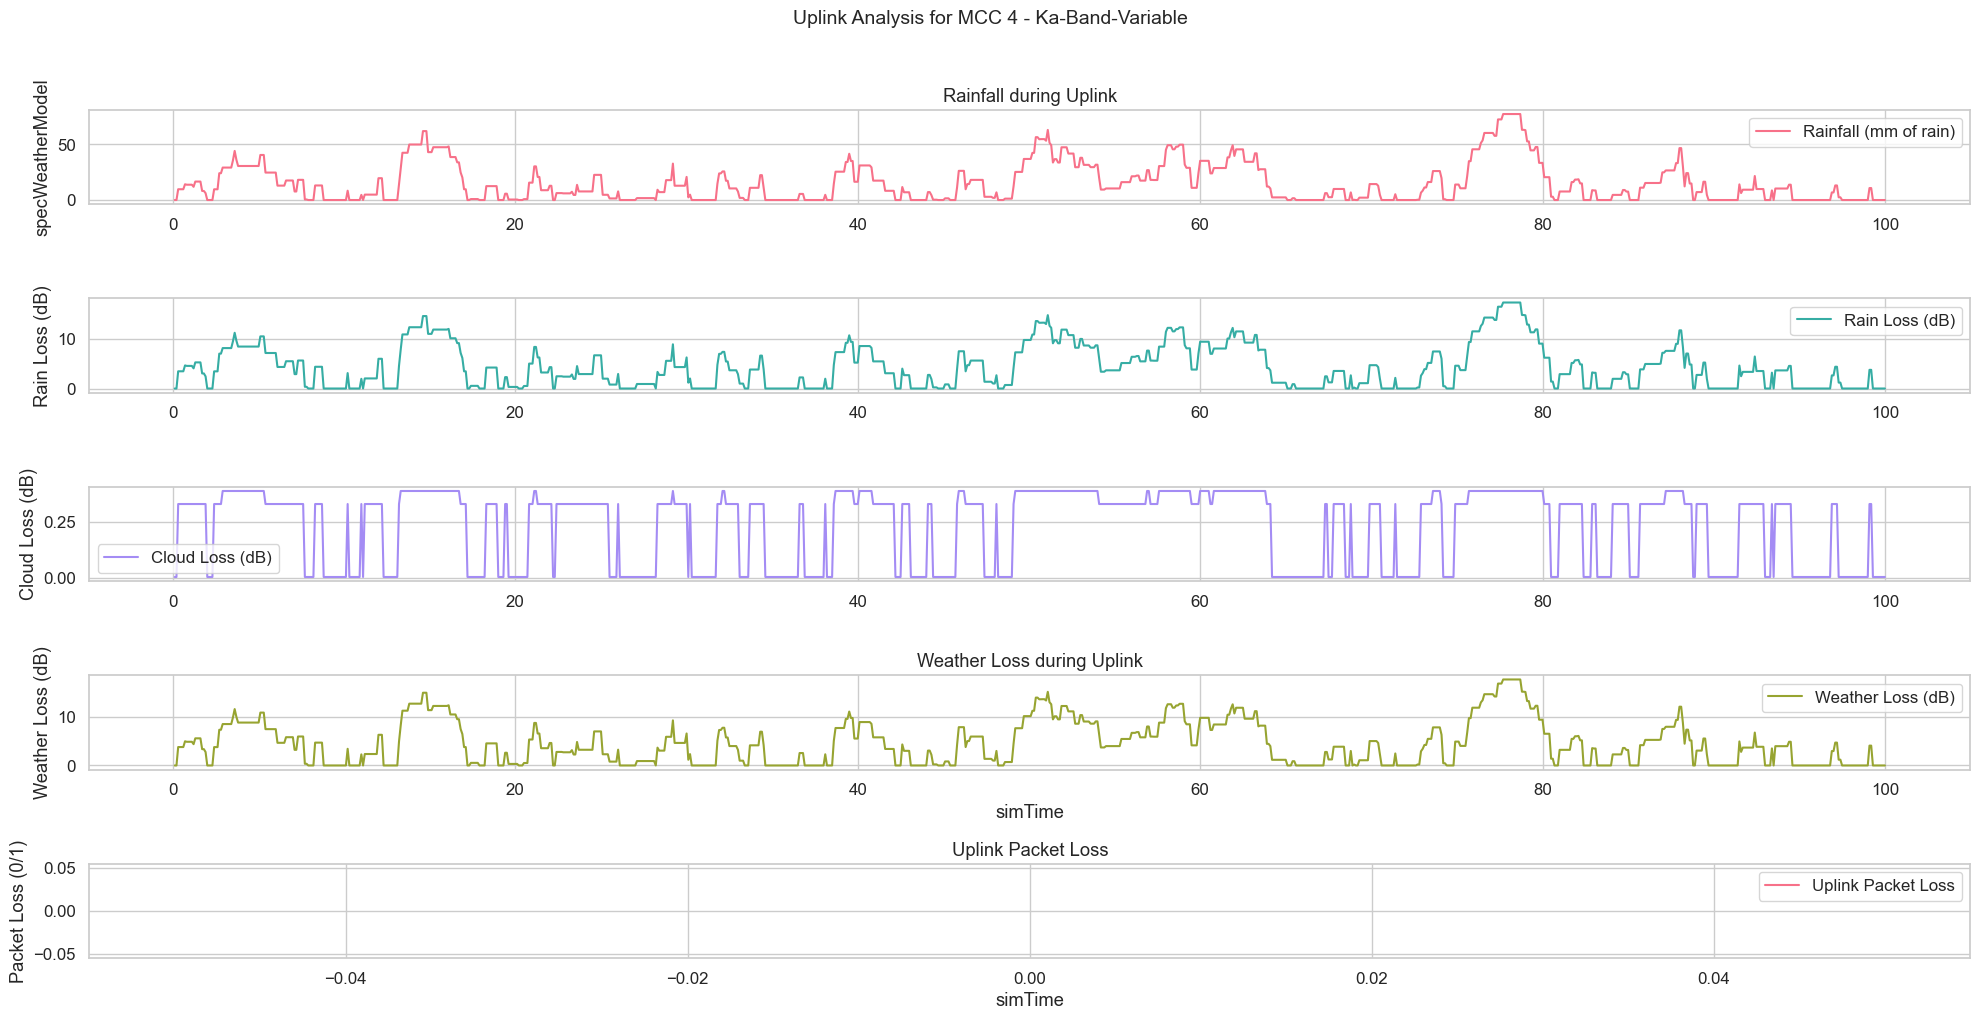

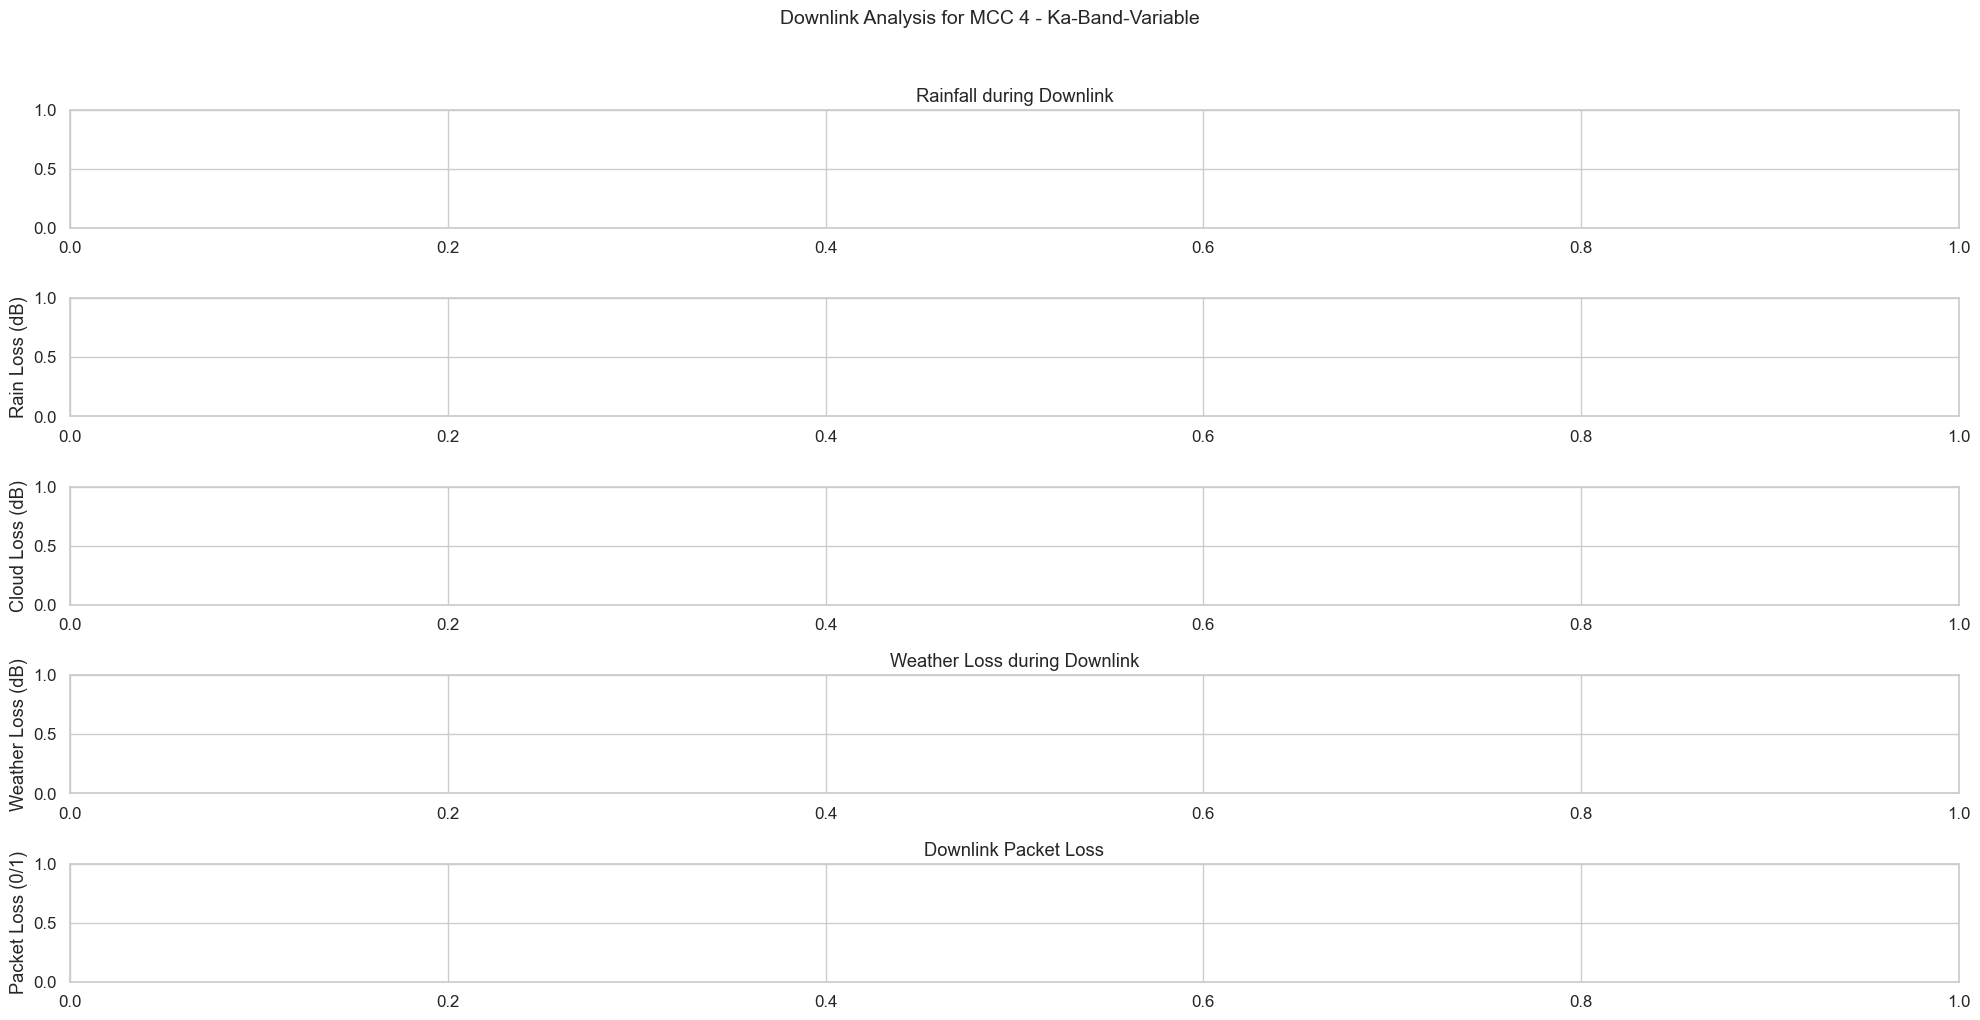

In [49]:
read_and_plot_files("Ka-Band-Variable")

# Static Weather Results

In [36]:
read_files("C-Band-Sunny")


Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 1.667
Stddev uplink Atmospheric loss (dB): 1.491
Average downlink Atmospheric loss (dB): 2.200
Stddev downlink Atmospheric loss (dB): 1.327

Average uplink FSPL (dB): 0.000
Stddev uplink FSPL (dB): 0.000
Average downlink FSPL (dB): 0.000
Stddev downlink FSPL (dB): 0.000

Average uplink power (dBm): 199.206
Stddev uplink power (dBm): 0.095
Average downlink power (dBm): 195.760
Stddev downlink power (dBm): 0.128


In [37]:
read_files("C-Band-Rainy")

MCC 0: Packets Lost = 0
MCC 1: Packets Lost = 0
MCC 2: Packets Lost = 0
MCC 3: Packets Lost = 0
MCC 4: Packets Lost = 0

Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 0.495
Stddev uplink Atmospheric loss (dB): 0.008
Average downlink Atmospheric loss (dB): 0.197
Stddev downlink Atmospheric loss (dB): 0.005

Average uplink FSPL (dB): 199.220
Stddev uplink FSPL (dB): 0.091
Average downlink FSPL (dB): 195.741
Stddev downlink FSPL (dB): 0.106

Average uplink power (dBm): -77.163
Stddev uplink power (dBm): 0.097
Average downlink power (dBm): -109.001
Stddev downlink power (dBm): 0.162


In [38]:
read_files("C-Band-HeavyRain")

MCC 0: Packets Lost = 0
MCC 1: Packets Lost = 0
MCC 2: Packets Lost = 0
MCC 3: Packets Lost = 0
MCC 4: Packets Lost = 0

Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 1.260
Stddev uplink Atmospheric loss (dB): 0.020
Average downlink Atmospheric loss (dB): 0.502
Stddev downlink Atmospheric loss (dB): 0.012

Average uplink FSPL (dB): 199.220
Stddev uplink FSPL (dB): 0.091
Average downlink FSPL (dB): 195.741
Stddev downlink FSPL (dB): 0.107

Average uplink power (dBm): -77.928
Stddev uplink power (dBm): 0.107
Average downlink power (dBm): -110.070
Stddev downlink power (dBm): 0.170


In [39]:
read_files("Ku-Band-Sunny")

MCC 0: Packets Lost = 912
MCC 1: Packets Lost = 1013
MCC 2: Packets Lost = 955
MCC 3: Packets Lost = 992
MCC 4: Packets Lost = 916

Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 0.000
Stddev uplink Atmospheric loss (dB): 0.000
Average downlink Atmospheric loss (dB): 0.000
Stddev downlink Atmospheric loss (dB): 0.000

Average uplink FSPL (dB): 206.531
Stddev uplink FSPL (dB): 0.068
Average downlink FSPL (dB): 205.198
Stddev downlink FSPL (dB): 0.066

Average uplink power (dBm): -83.978
Stddev uplink power (dBm): 0.068
Average downlink power (dBm): -125.076
Stddev downlink power (dBm): 0.126


In [40]:
read_files("Ku-Band-Rainy")

MCC 0: Packets Lost = 892
MCC 1: Packets Lost = 948
MCC 2: Packets Lost = 985
MCC 3: Packets Lost = 937
MCC 4: Packets Lost = 838

Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 3.432
Stddev uplink Atmospheric loss (dB): 0.024
Average downlink Atmospheric loss (dB): 2.411
Stddev downlink Atmospheric loss (dB): 0.019

Average uplink FSPL (dB): 206.531
Stddev uplink FSPL (dB): 0.068
Average downlink FSPL (dB): 205.197
Stddev downlink FSPL (dB): 0.065

Average uplink power (dBm): -87.410
Stddev uplink power (dBm): 0.083
Average downlink power (dBm): -130.918
Stddev downlink power (dBm): 0.137


In [41]:
read_files("Ku-Band-HeavyRain")

MCC 0: Packets Lost = 890
MCC 1: Packets Lost = 965
MCC 2: Packets Lost = 928
MCC 3: Packets Lost = 978
MCC 4: Packets Lost = 885

Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 8.731
Stddev uplink Atmospheric loss (dB): 0.061
Average downlink Atmospheric loss (dB): 6.135
Stddev downlink Atmospheric loss (dB): 0.049

Average uplink FSPL (dB): 206.531
Stddev uplink FSPL (dB): 0.068
Average downlink FSPL (dB): 205.198
Stddev downlink FSPL (dB): 0.066

Average uplink power (dBm): -92.709
Stddev uplink power (dBm): 0.112
Average downlink power (dBm): -139.942
Stddev downlink power (dBm): 0.164


In [42]:
read_files("Ka-Band-Sunny")

MCC 0: Packets Lost = 838
MCC 1: Packets Lost = 894
MCC 2: Packets Lost = 864
MCC 3: Packets Lost = 886
MCC 4: Packets Lost = 881

Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 0.000
Stddev uplink Atmospheric loss (dB): 0.000
Average downlink Atmospheric loss (dB): 0.000
Stddev downlink Atmospheric loss (dB): 0.000

Average uplink FSPL (dB): 213.131
Stddev uplink FSPL (dB): 0.062
Average downlink FSPL (dB): 209.618
Stddev downlink FSPL (dB): 0.061

Average uplink power (dBm): -90.578
Stddev uplink power (dBm): 0.062
Average downlink power (dBm): -136.096
Stddev downlink power (dBm): 0.121


In [43]:
read_files("Ka-Band-Rainy")

MCC 0: Packets Lost = 0
MCC 1: Packets Lost = 0
MCC 2: Packets Lost = 0
MCC 3: Packets Lost = 0
MCC 4: Packets Lost = 0

Satellite: Packets Lost = 5705

Average uplink Atmospheric loss (dB): 19.703
Stddev uplink Atmospheric loss (dB): 0.064
Average downlink Atmospheric loss (dB): nan
Stddev downlink Atmospheric loss (dB): nan

Average uplink FSPL (dB): 213.131
Stddev uplink FSPL (dB): 0.062
Average downlink FSPL (dB): nan
Stddev downlink FSPL (dB): nan



C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divi

Average uplink power (dBm): -110.281
Stddev uplink power (dBm): 0.103
Average downlink power (dBm): nan
Stddev downlink power (dBm): nan


In [44]:
read_files("Ka-Band-HeavyRain")

MCC 0: Packets Lost = 0
MCC 1: Packets Lost = 0
MCC 2: Packets Lost = 0
MCC 3: Packets Lost = 0
MCC 4: Packets Lost = 0

Satellite: Packets Lost = 5625

Average uplink Atmospheric loss (dB): 50.128
Stddev uplink Atmospheric loss (dB): 0.163
Average downlink Atmospheric loss (dB): nan
Stddev downlink Atmospheric loss (dB): nan



C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divi

Average uplink FSPL (dB): 213.131
Stddev uplink FSPL (dB): 0.062
Average downlink FSPL (dB): nan
Stddev downlink FSPL (dB): nan

Average uplink power (dBm): -140.706
Stddev uplink power (dBm): 0.192
Average downlink power (dBm): nan
Stddev downlink power (dBm): nan


In [45]:
read_files("C-Band-Variable")

MCC 0: Packets Sent = 1075
MCC 0: Packets Lost = 0
MCC 1: Packets Sent = 1075
MCC 1: Packets Lost = 0
MCC 2: Packets Sent = 1074
MCC 2: Packets Lost = 0
MCC 3: Packets Sent = 1074
MCC 3: Packets Lost = 0
MCC 4: Packets Sent = 1074
MCC 4: Packets Lost = 0

Satellite: Packets Sent = 5365
Satellite: Packets Lost = 0

Average uplink Atmospheric loss (dB): 2.000
Stddev uplink Atmospheric loss (dB): 1.414
Average downlink Atmospheric loss (dB): 2.010
Stddev downlink Atmospheric loss (dB): 1.411

Average uplink FSPL (dB): 0.071
Stddev uplink FSPL (dB): 0.114
Average downlink FSPL (dB): 0.009
Stddev downlink FSPL (dB): 0.013

Average uplink power (dBm): 0.341
Stddev uplink power (dBm): 0.247
Average downlink power (dBm): 0.658
Stddev downlink power (dBm): 0.476
